# 🚢 TITANIC에서 살아남기

안녕하세요 DArt-B 여러분, 2025-2 정규학기 첫 번째 과제는 Titanic과 함께 시작하게 되었습니다. 🚢

파이썬이 익숙하지 않거나 머신러닝 경험이 적은 분들을 위해 Baseline 코드를 제공합니다.
이 코드가 가장 이상적인 해법은 아닙니다. 그러나 이 코드만으로도 결과를 도출할 수 있으니, 코드 자체에 얽매이기보다는 개인적인 사고와 판단에 더 많은 에너지를 쏟아주시길 바랍니다.

과제를 진행할 때는 Baseline 코드의 주석 부분을 직접 채워 넣어 동일한 결과가 나오도록 해보세요.
작업은 원본을 바로 수정하지 말고, 사본을 만들어 결과를 확인하면서 채워나가는 방식을 권장합니다.
혹시 진행 중 막히거나 잘 안 되는 부분이 있으면, 너다나비와 함께 고민하며 해결해 나가면 됩니다.

## connection to google account

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/titanic/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

## 데이터 파악

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- gender:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 학습용 데이터(ori_train)의 상위 5개를 미리 확인하는 코드입니다.
# 데이터가 제대로 불려와졌는지 확인, 각 컬럼의 이름과 값들이 어떤 형태인지 직관적으로 파악 가능


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 👇 여기에 코드를 작성하세요.
# 테스트 데이터(ori_test)의 상위 5개 행을 미리 확인하는 코드입니다.



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(ori_train.shape) #행과 열 크기 확인
print(ori_test.shape)

(891, 12)
(418, 11)


In [ ]:
print(ori_train.columns) #Survived 존재
print(ori_test.columns) #Survived 없음

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# 👇 여기에 코드를 작성하세요.
# 학습용 데이터(ori_train)의 전체적인 구조 정보를 출력하는 코드입니다.
#info()를 통해 전체 row 수, 칼럼별 데이터타입, 데이터타입의 null 여부, 칼럼 타입 등을 확인할 수 있습니다.
#Age, Cabin, Embarked에 대해 null 값이 존재합니다.
# 데이터 전처리 시 어떤 컬럼에 결측치가 있는지, 타입 변환이 필요한지 확인할 수 있습니다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 👇 여기에 코드를 작성하세요.
# 학습 데이터(ori_train)와 테스트 데이터(ori_test)의 결측치 개수를 확인합니다.
# -.isnull() : 각 셀의 결측치 여부 (True/False)를 반환
# -.sum() : True 값을 합산하여, 각 컬럼별 결측치 개수를 계산


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
ori_train.describe()
#데이터의 분포도를 아는 것은 머신러닝 알고리즘의 성능을 향상시킵니다.
#회귀에서 결정값이 정규 분포를 이루지 않고 왜곡되는 경우, 이상치가 많은 경우 예측 성능이 저하됩니다.
#(describe 매서드로 정확한 분포도를 알 순 없지만) 개략적 수준의 분포도를 알 수 있어 유리합니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 학습 데이터의 'Pclass' 컬럼(승객의 사회적/경제적 지위: 1, 2, 3등석)의 값을 집계하는 코드입니다.
# - .value_counts() : 해당 컬럼에서 각 고유값이 등장한 횟수를 세어 반환
# 이를 통해 각 등급별 승객 수의 분포를 확인할 수 있습니다.
# 👇 여기에 코드를 작성하세요.


,count
Pclass,
3,491
1,216
2,184


# EDA

전처리에 앞서, 데이터의 분포를 확인하면
다중공선성에 의문을 제기하거나, 결측치 대체 방법에 대한 힌트를 얻을 수 있습니다. 또한 가설 검정 전, 나의 가설이 검정할 가치가 있는지를 확인할 수도 있습니다.

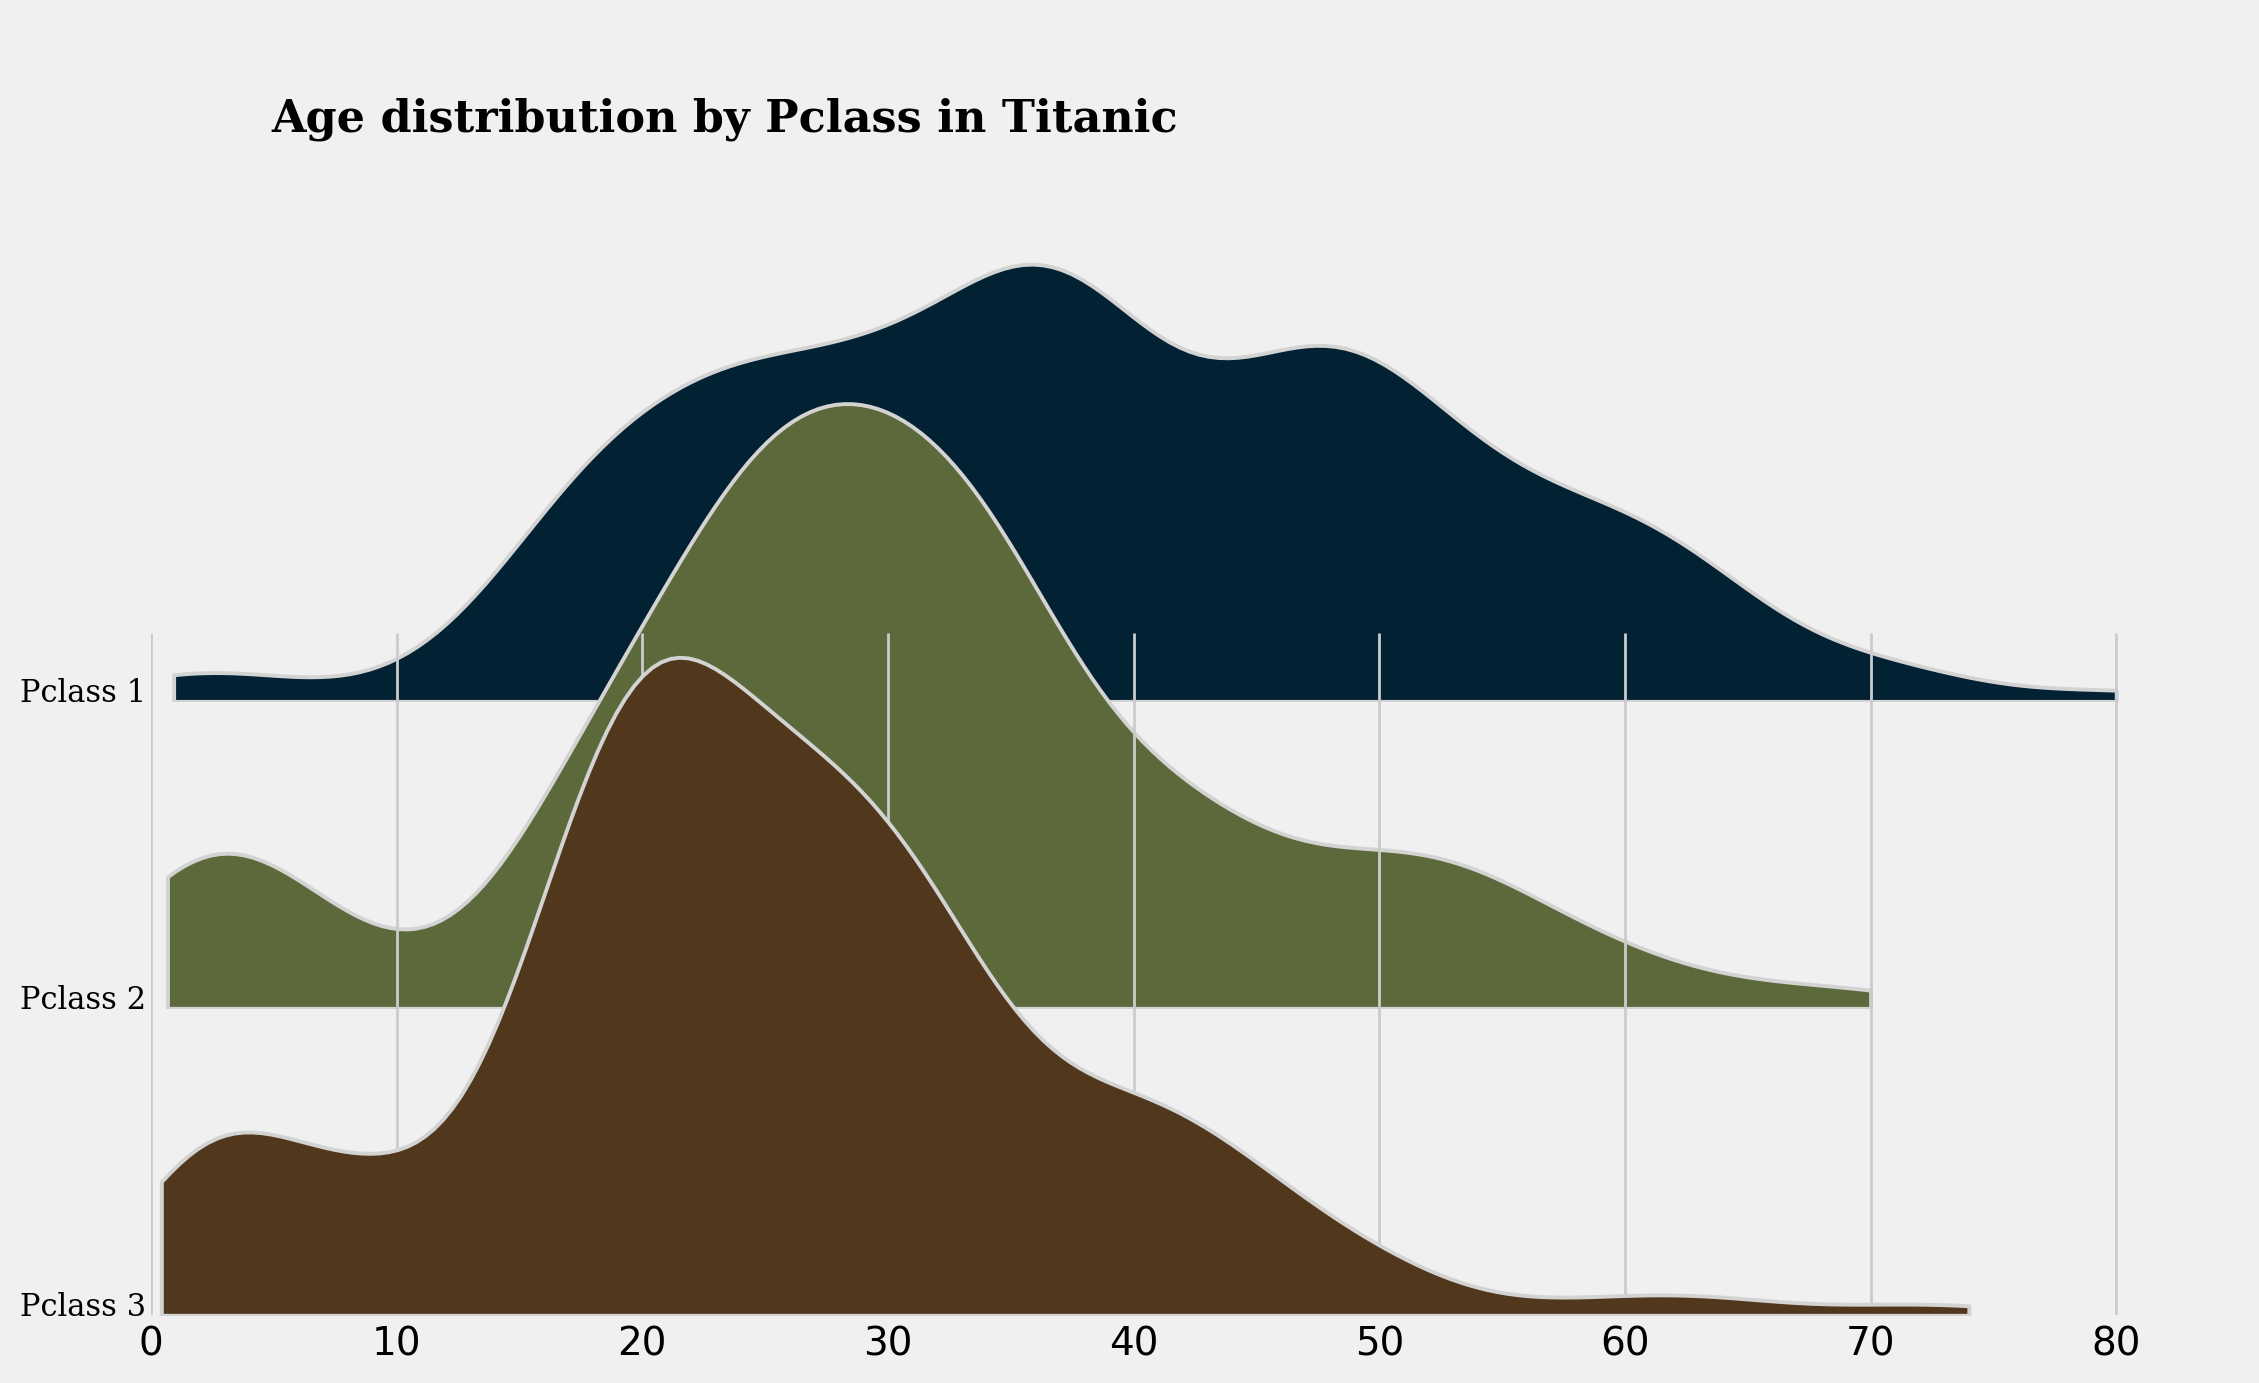

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(ori_train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=ori_train[ori_train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray',color=c, alpha=1)

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

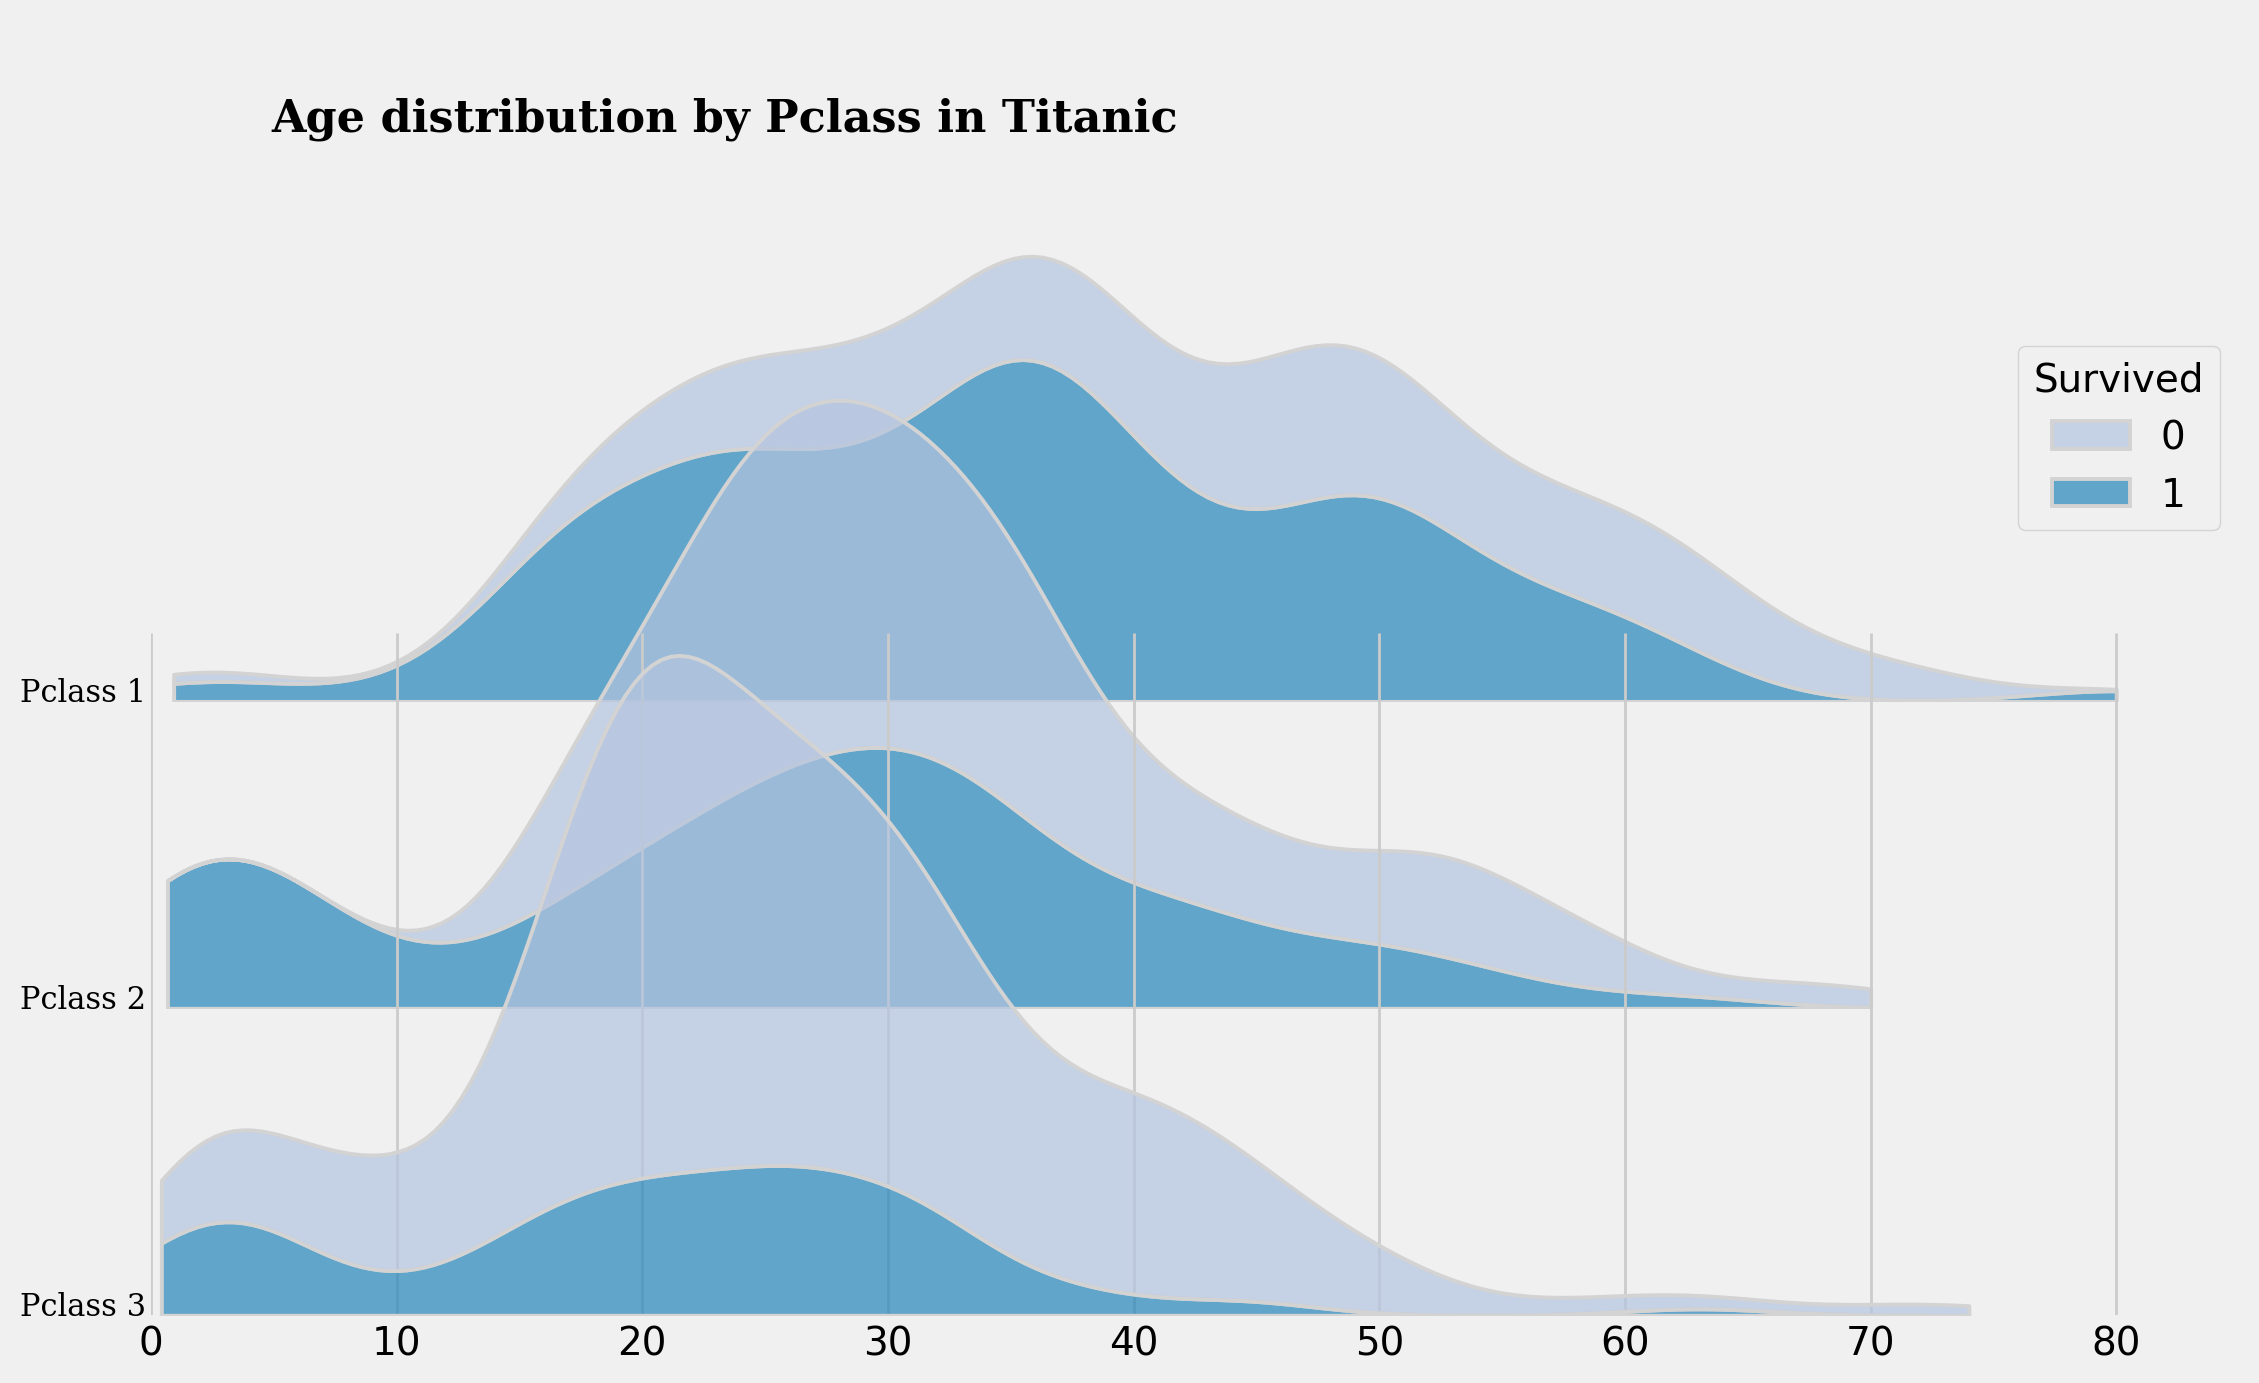

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(ori_train['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=ori_train[ori_train['Pclass']==cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray', hue='Survived',
                multiple="stack", palette='PuBu', alpha=0.7
               )

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()

PClass는 유의해보이므로, 검정해도 좋아보입니다. (클래스가 높아질수록 살아남을 확률이 높아 보입니다.)

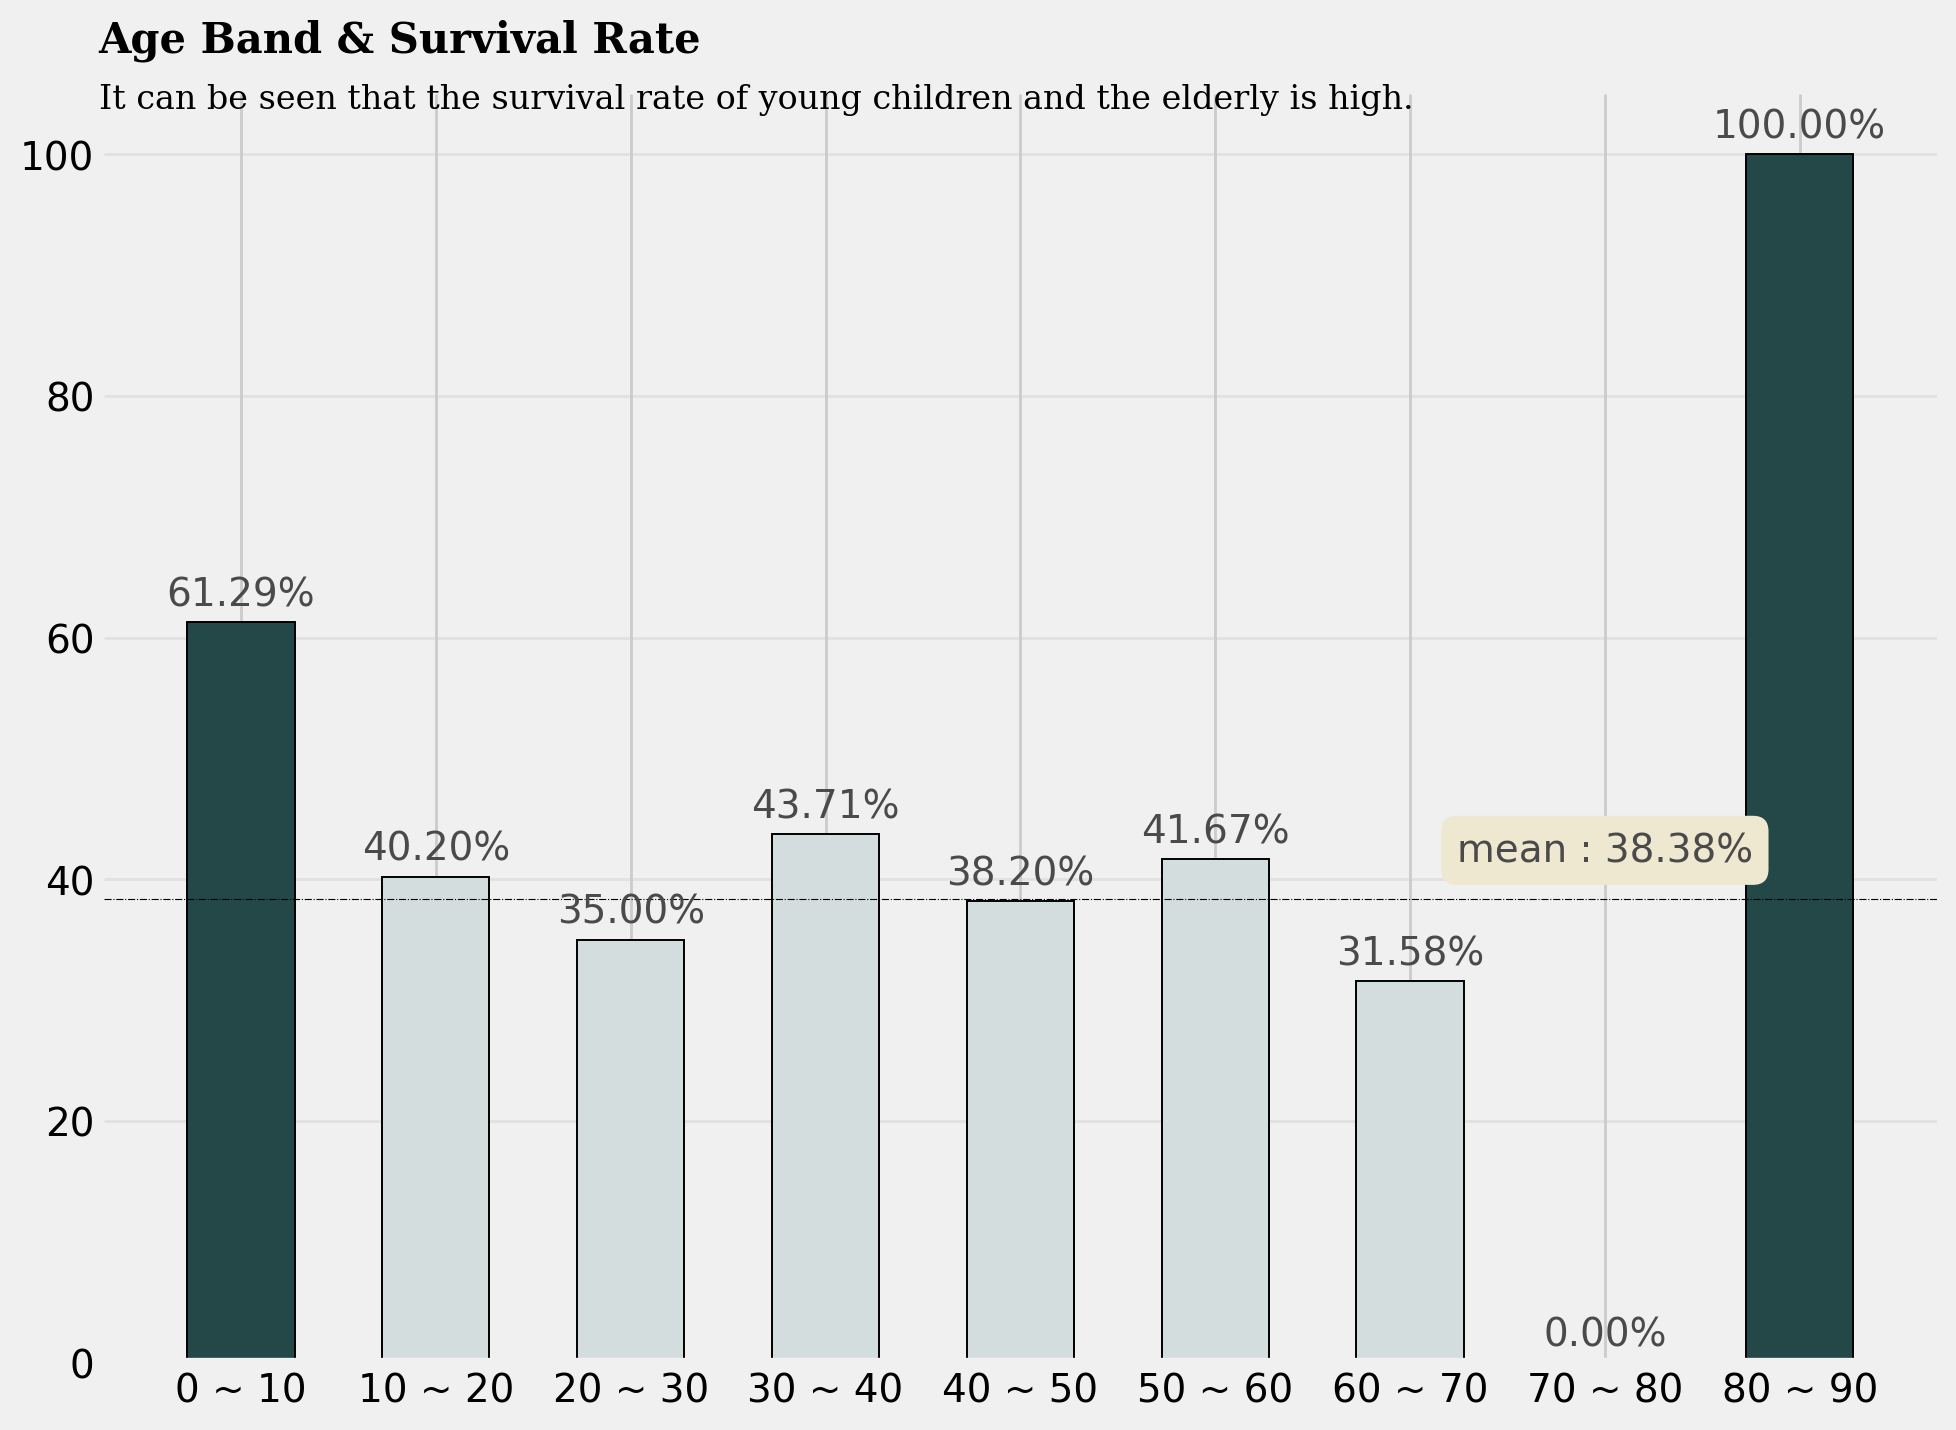

In [ ]:
# 나이를 10살 단위 구간으로 변환하는 함수 정의
# 예: 나이 23 → '20 ~ 30', 나이 7 → '0 ~ 10'
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

# Age 컬럼에 age_band 함수를 적용해 새 컬럼 'age_band' 생성
ori_train['age_band'] = ori_train['Age'].apply(age_band)

# 👇 여기에 코드를 작성하세요.
# Here
# 1. 'age_band'와 'Survived'를 기준으로 그룹화합니다.
# 2. 그룹별로 생존/사망 인원을 집계합니다. (value_counts, unstack 등 활용 가능)
# 3. 결측치는 0으로 채워줍니다.
# 4. 'Survival rate' 컬럼을 추가해 각 구간별 생존률(%)을 계산합니다.

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'],
       color=color_map, width=0.55,
       edgecolor='black',
       linewidth=0.7)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%",
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light',
                   color='#4a4a4a')


# mean line + annotation
mean = ori_train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%",
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))


# Title & Subtitle
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

나이 또한 유의해보이므로, 검정해도 좋아보입니다.

In [ ]:
survival_rate = ori_train.groupby(['Sex'])['Survived'].mean()
survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(ori_train[(ori_train['Sex']=='male') & (ori_train['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(ori_train[(ori_train['Sex']=='male') & (ori_train['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(ori_train[(ori_train['Sex']=='female') & (ori_train['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(ori_train[(ori_train['Sex']=='female') & (ori_train['Survived']==0)]))

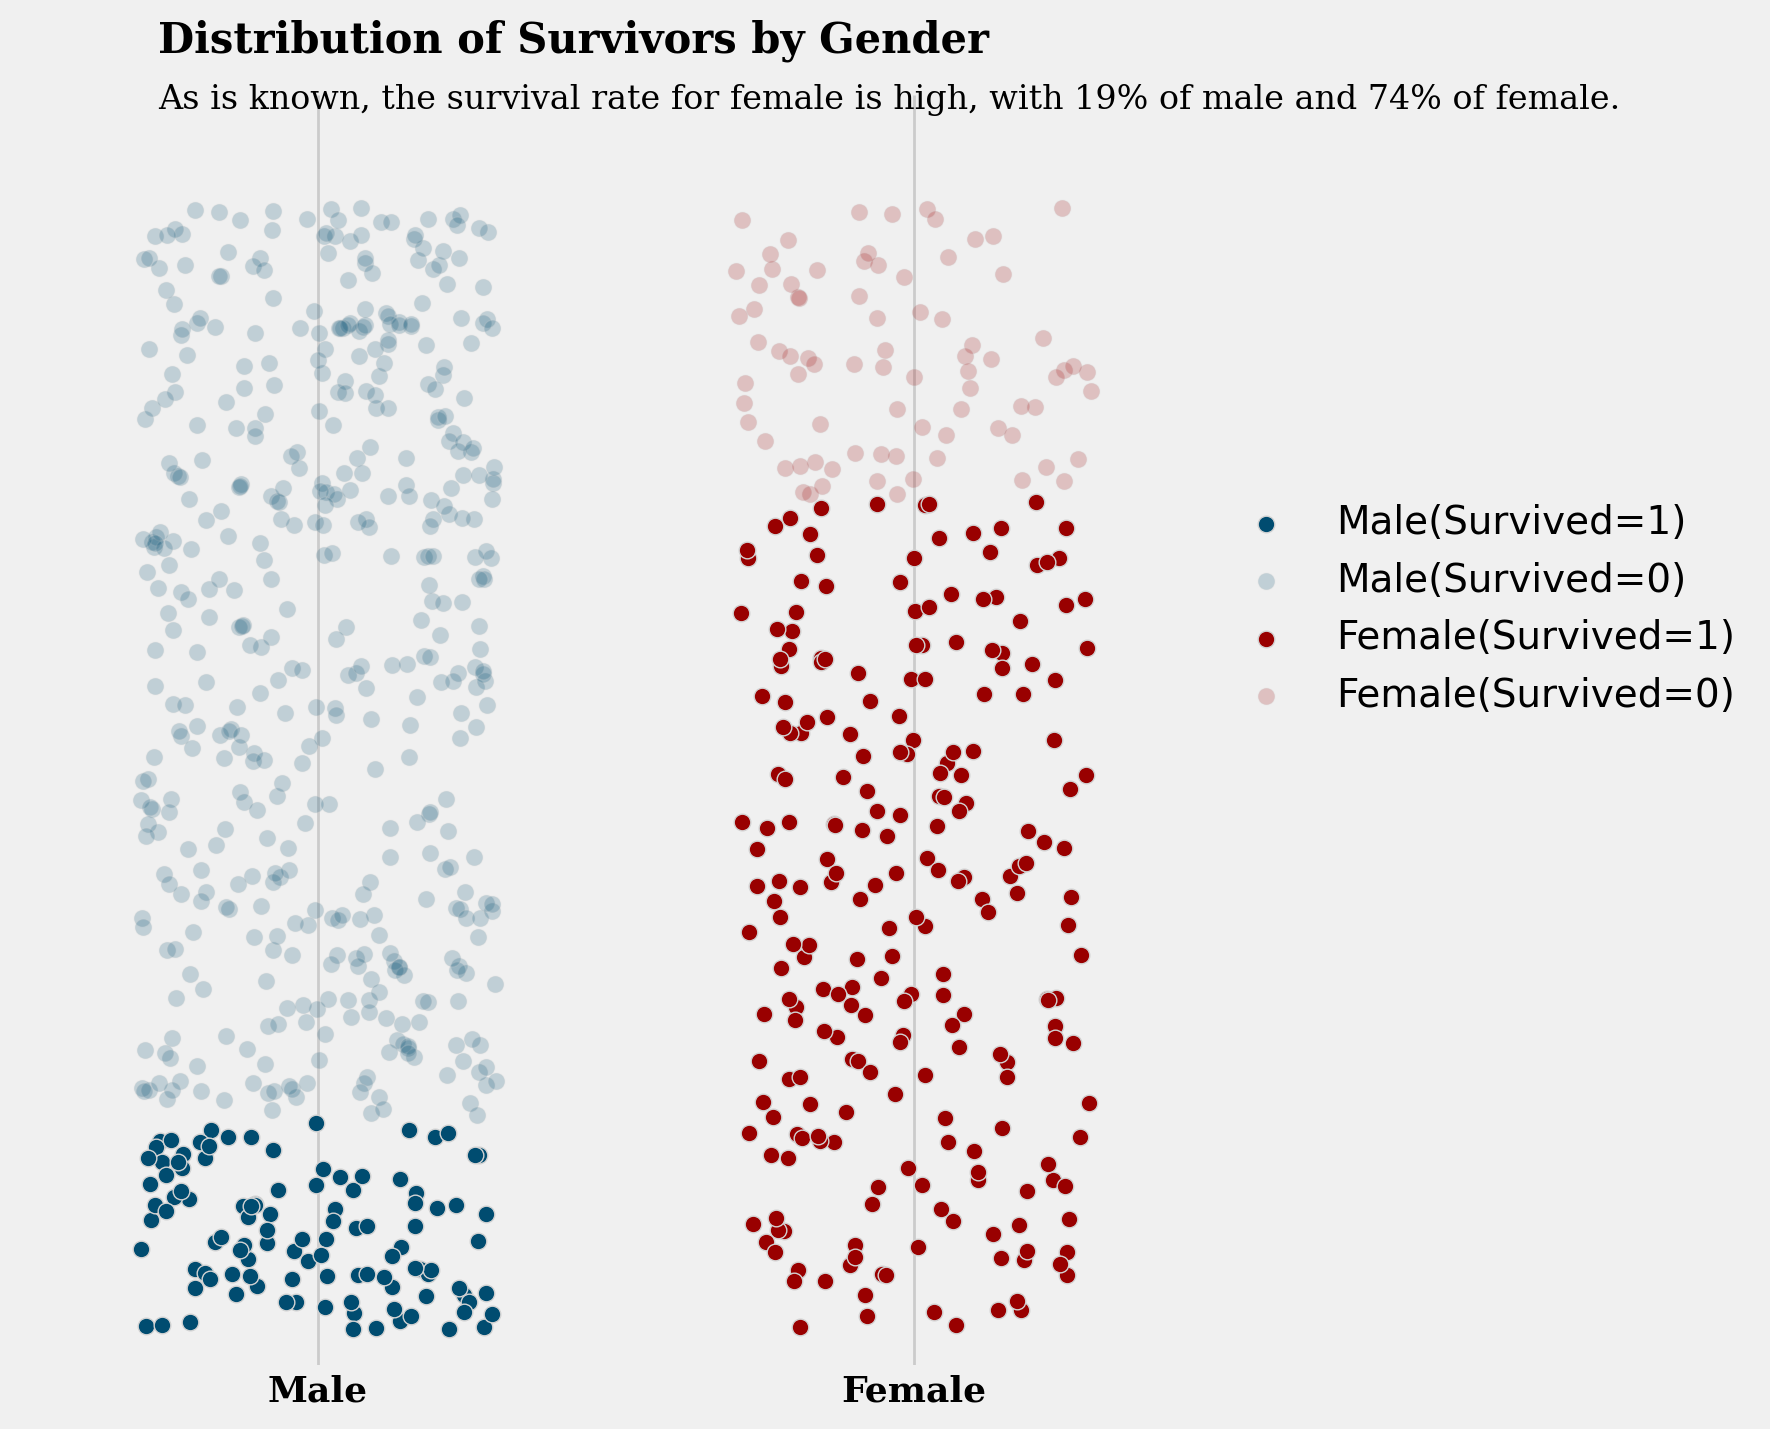

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


성별은 유의해보이므로 검정해도 좋아보입니다.

SibSp, Parch, Fare을 포함한 값들에 대해서도 EDA를 진행하고, 가설 검정의 가치가 있는지를 파악하면 좋습니다.
통계적 검증 방법론을 사용하여 숫자로만 보는 것이 항상 옳지는 않습니다.

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

# 통계적 검증에 대하여

가장 많이 사용하시는 corr() 메소드, 즉 피어슨 상관계수입니다.
그러나 피어슨 상관계수가 모든 데이터에 효과적이진 않습니다.

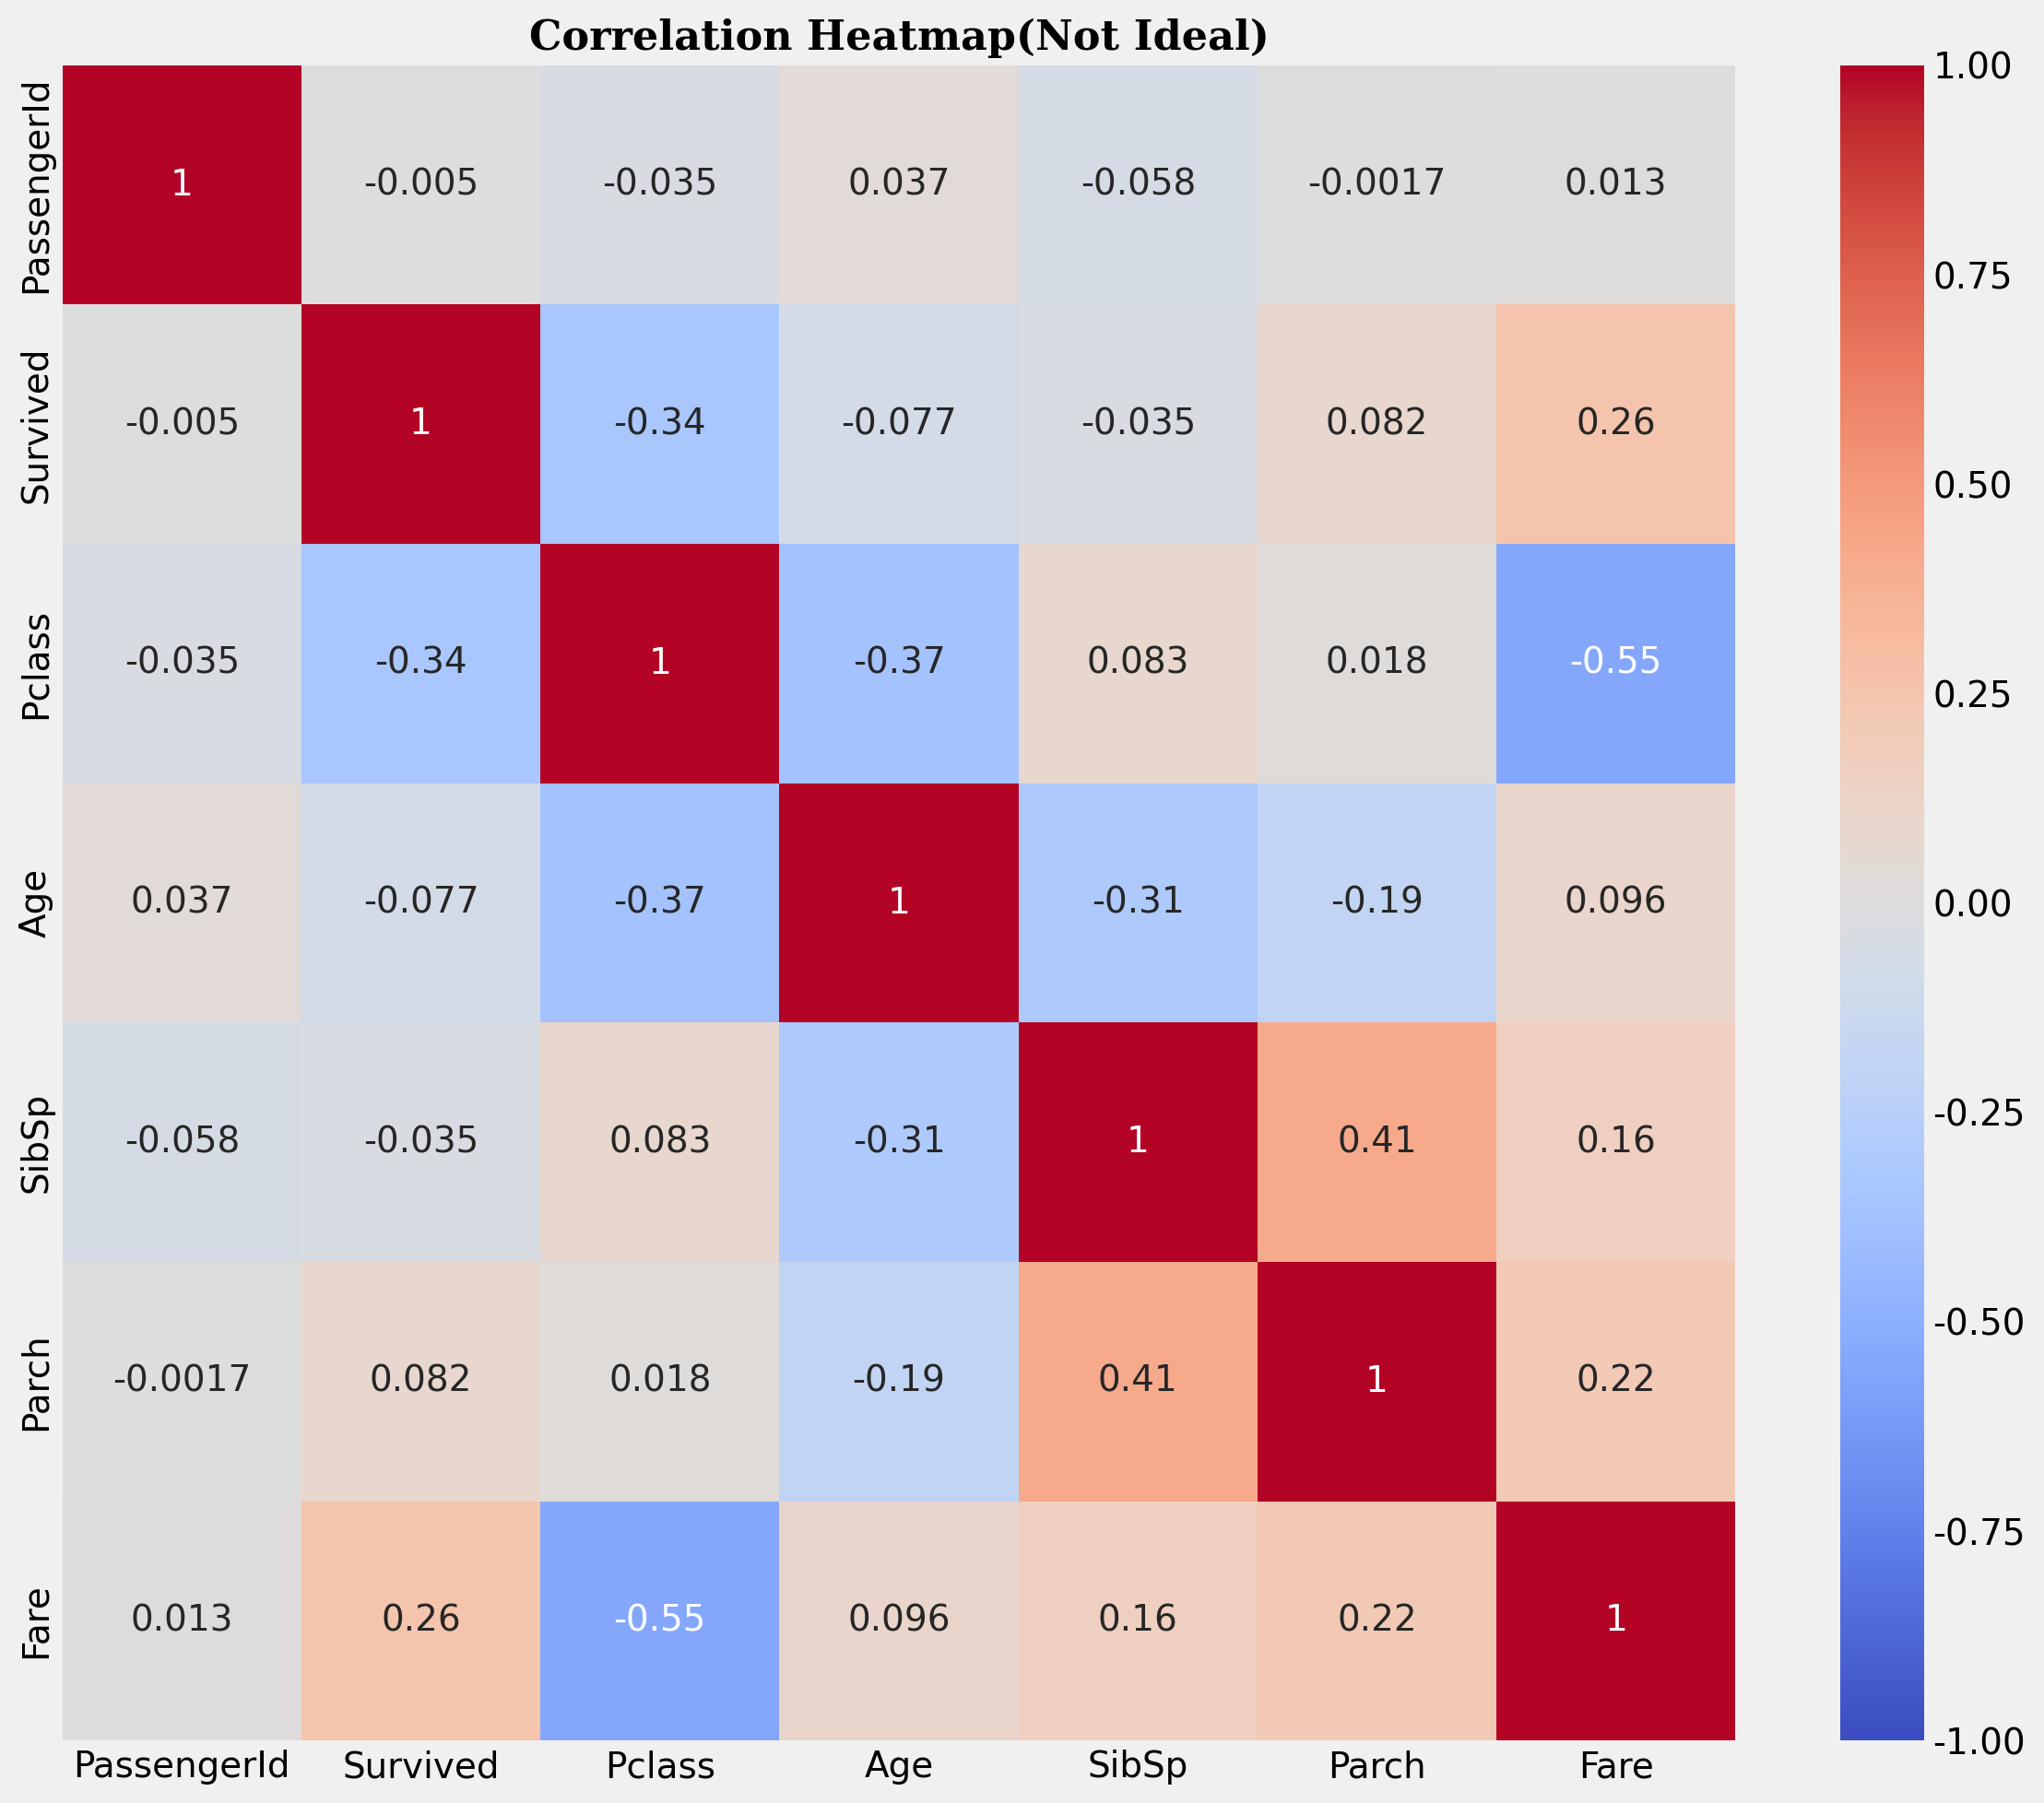

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. 훈련 데이터에서 숫자형 변수만 선택합니다. (select_dtypes 활용 가능)
# 2. 상관계수를 계산합니다. (corr() 메서드 활용)
# 3. Heatmap으로 시각화하세요.
#    - annot=True 옵션을 주면 각 셀에 상관계수 값 표시
#    - 색상 범위는 -1 ~ 1로 설정
#    - 중앙값은 0으로 맞추기
#    - 색상 맵은 'coolwarm'을 사용
# 4. 시각화 제목을 'Correlation Heatmap(Not Ideal)'로 설정합니다.



위의 결과는 옳지 못합니다.
Survived는 이진값에 가까우므로, 연속형 - 연속형 상관관계에 사용되는 피어슨 상관계수를 이용하여 올바른 값을 도출하기 어렵습니다.데이터의 타입에 맞는 다른 검증 방법을 사용하는 것이 좋습니다.

In [ ]:
ori_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

대표적으로 아래 컬럼들에 대해 검정을 진행해보겠습니다.

### 범주형 변수 - 이진 변수 (Embarked, Sex)

In [ ]:
# 카이제곱 검정 : 범주형 변수와 이진 변수 간의 독립성 테스트
from scipy.stats import chi2_contingency

Embarked_Survived = pd.crosstab(ori_train['Survived'], ori_train['Embarked'])

chi2, p, dof, expected = chi2_contingency(Embarked_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#chi-square이 클수록 독립성이 낮아져, 두 변수 간 유의미한 관계가 있을 가능성이 높아짐
#p-value 0.05 이하일 때 통계적으로 유의미하다는 결론

Chi-square: 26.48914983923762, p-value: 1.769922284120912e-06


In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. 성별(Sex)과 생존 여부(Survived)의 교차표(crosstab)를 생성합니다.
# 2. 카이제곱 독립성 검정을 수행합니다. (chi2_contingency 함수 활용)
#    - chi2, p-value, 자유도(dof), 기대도수(expected)가 반환됩니다.
# 3. 검정 결과(Chi-square 값, p-value)를 출력하세요.

Chi-square: 260.71702016732104, p-value: 1.1973570627755645e-58


두 값으로 미루어볼 때, Sex와 Survived 간의 강한 상관관계를 확인할 수 있습니다.

### 순서 척도 - 이진 변수 (Pclass, SibSp, Parch)

In [ ]:
# Spearman's Rank Correlation 계산
from scipy.stats import spearmanr

correlation, p_value = spearmanr(ori_train['Survived'], ori_train['Pclass'])
print(f"Spearman's Rank Correlation: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")
#우연이 아닌 약한 상관관계를 가지고 있을 가능성

Spearman's Rank Correlation: -0.34
p-value: 0.0000


In [ ]:
#Pclass를 순서 척도가 아닌 범주형 변수로 취급한다면?
Pclass_Survived = pd.crosstab(ori_train['Pclass'], ori_train['Survived'])

chi2, p, dof, expected = chi2_contingency(Pclass_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#Pclass의 값이 생존 확률에 영향을 미친다.

Chi-square: 102.88898875696056, p-value: 4.549251711298793e-23


### 연속형 변수 - 이진 변수 (Age, Fare)

In [ ]:
#Age에 결측치 값이 있었으므로, 결측값 row를 제외하여 따로 샘플을 만들었습니다.
sample_train = ori_train.copy()

In [ ]:
sample_train = sample_train.dropna(subset=['Age'])

In [ ]:
sample_train = sample_train[['Age', 'Survived']]

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. Survived(이분형: 0/1)과 Age(연속형) 간의 관계를 점-이분 상관계수(point-biserial correlation)로 계산합니다.
#    - pointbiserialr 함수 활용
#    - corr(상관계수), p-value(유의확률)을 반환합니다.
# 2. corr 값이 0에 가까우면 두 변수 간에 거의 관계가 없음을 의미합니다.
# 3. p-value를 통해 통계적으로 유의한지 확인합니다.
#    (예: p < 0.05 → 유의, 그렇지 않으면 유의하지 않음)
# 4. 결과를 출력하세요.



Point-Biserial Correlation: -0.08
p-value: 0.0391


그런데 나이가 적다고 많이 살고, 나이가 많다고 적게 산 건 아니었습니다. 오히려 어린 연령대와 나이 많은 연령대의 생존율이 높았으니까요. 이렇게 판단하면 안될 것 같습니다.
이렇게 수치형 변수가 비선형적인 경우는 어떻게 할까요? 팀원과 고민해보세요.

이런 검정을 통해 모델의 성능에 좋지 않은 영향을 끼치며, 과적합 확률을 높이는 피쳐들을 제외하도록 합니다.

# 피쳐 선택

## 결측치 처리

컬럼 중, PassengerId, Name, Ticket, Cabin, SibSp, Parch는 드랍하겠습니다.

피쳐 선택 시에는 다중공선성을 확인하여 정말 모델링에 사용할 피쳐를 선택할 것입니다. 이에 결측값, 이상치 등은 분석 결과를 왜곡시킬 수 있으며, 모델의 신뢰성을 저하시킬 수 있습니다. 따라서 결측치 처리의 순서가 선행되어야 합니다.

In [ ]:
input_train = ori_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [ ]:
#사용할 것 중에서는 Embarked와 Age의 결측치만이 있네요.
input_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,2


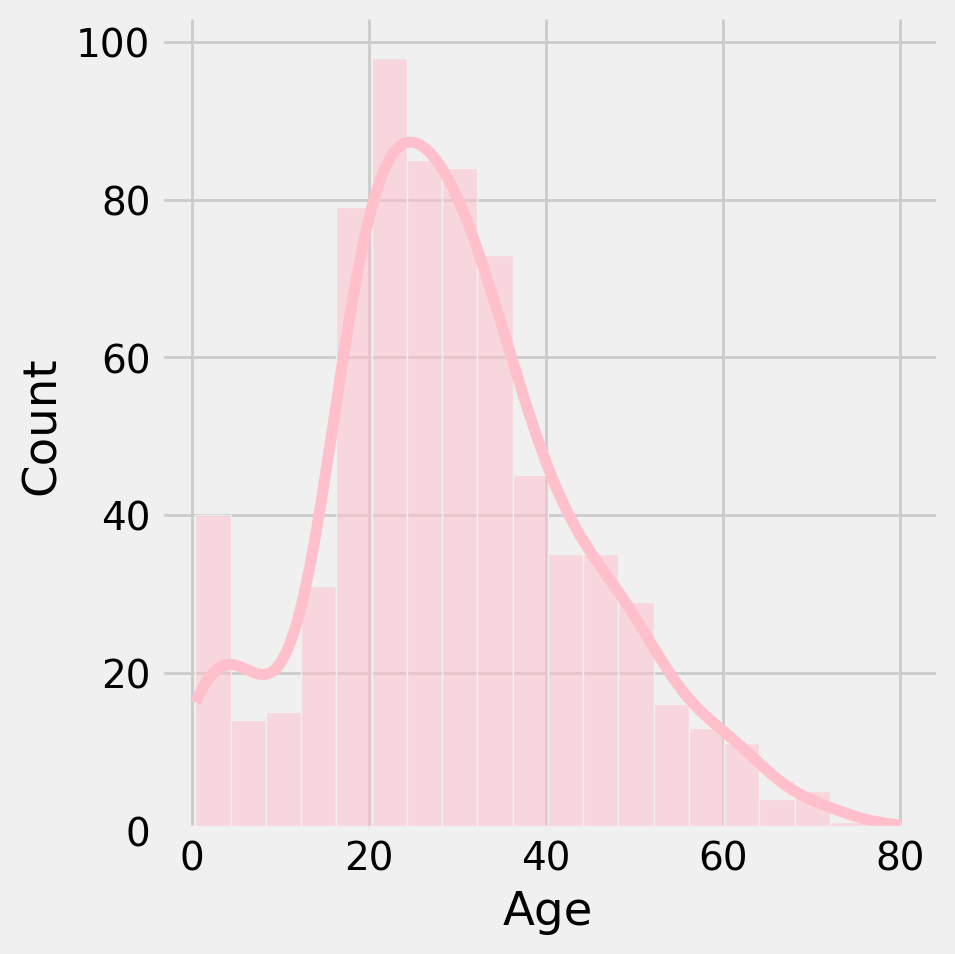

In [ ]:
#Mean or Median? 데이터 분포를 확인해 결정하기!
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

데이터 분포가 정규분포의 모양에서 크게 벗어나 왜곡되거나 쏠리지는 않았습니다.

In [ ]:
print(input_train['Age'].mean())
print(input_train['Age'].median())
#실제로 거의 비슷하네요. median을 선택하겠습니다.

29.69911764705882
28.0


In [ ]:
input_train['Age'].fillna(input_train['Age'].median(), inplace=True)

In [ ]:
input_train['Embarked'].fillna(input_train['Embarked'].mode()[0], inplace=True)

Embarked는 범주형 변수이므로 Mode(최빈값)으로 결측치를 보완했습니다.

## 다중 공선성의 확인

다만, 다중공선성이 있다면 문제가 됩니다. 예를 들어, Age가 높을 수록 돈이 많아 Pclass 등급이 높을 수 있고, Fare를 많이 지불할수록 Pclass가 높아질 수 있겠죠.

In [ ]:
vif_test = input_train.copy()

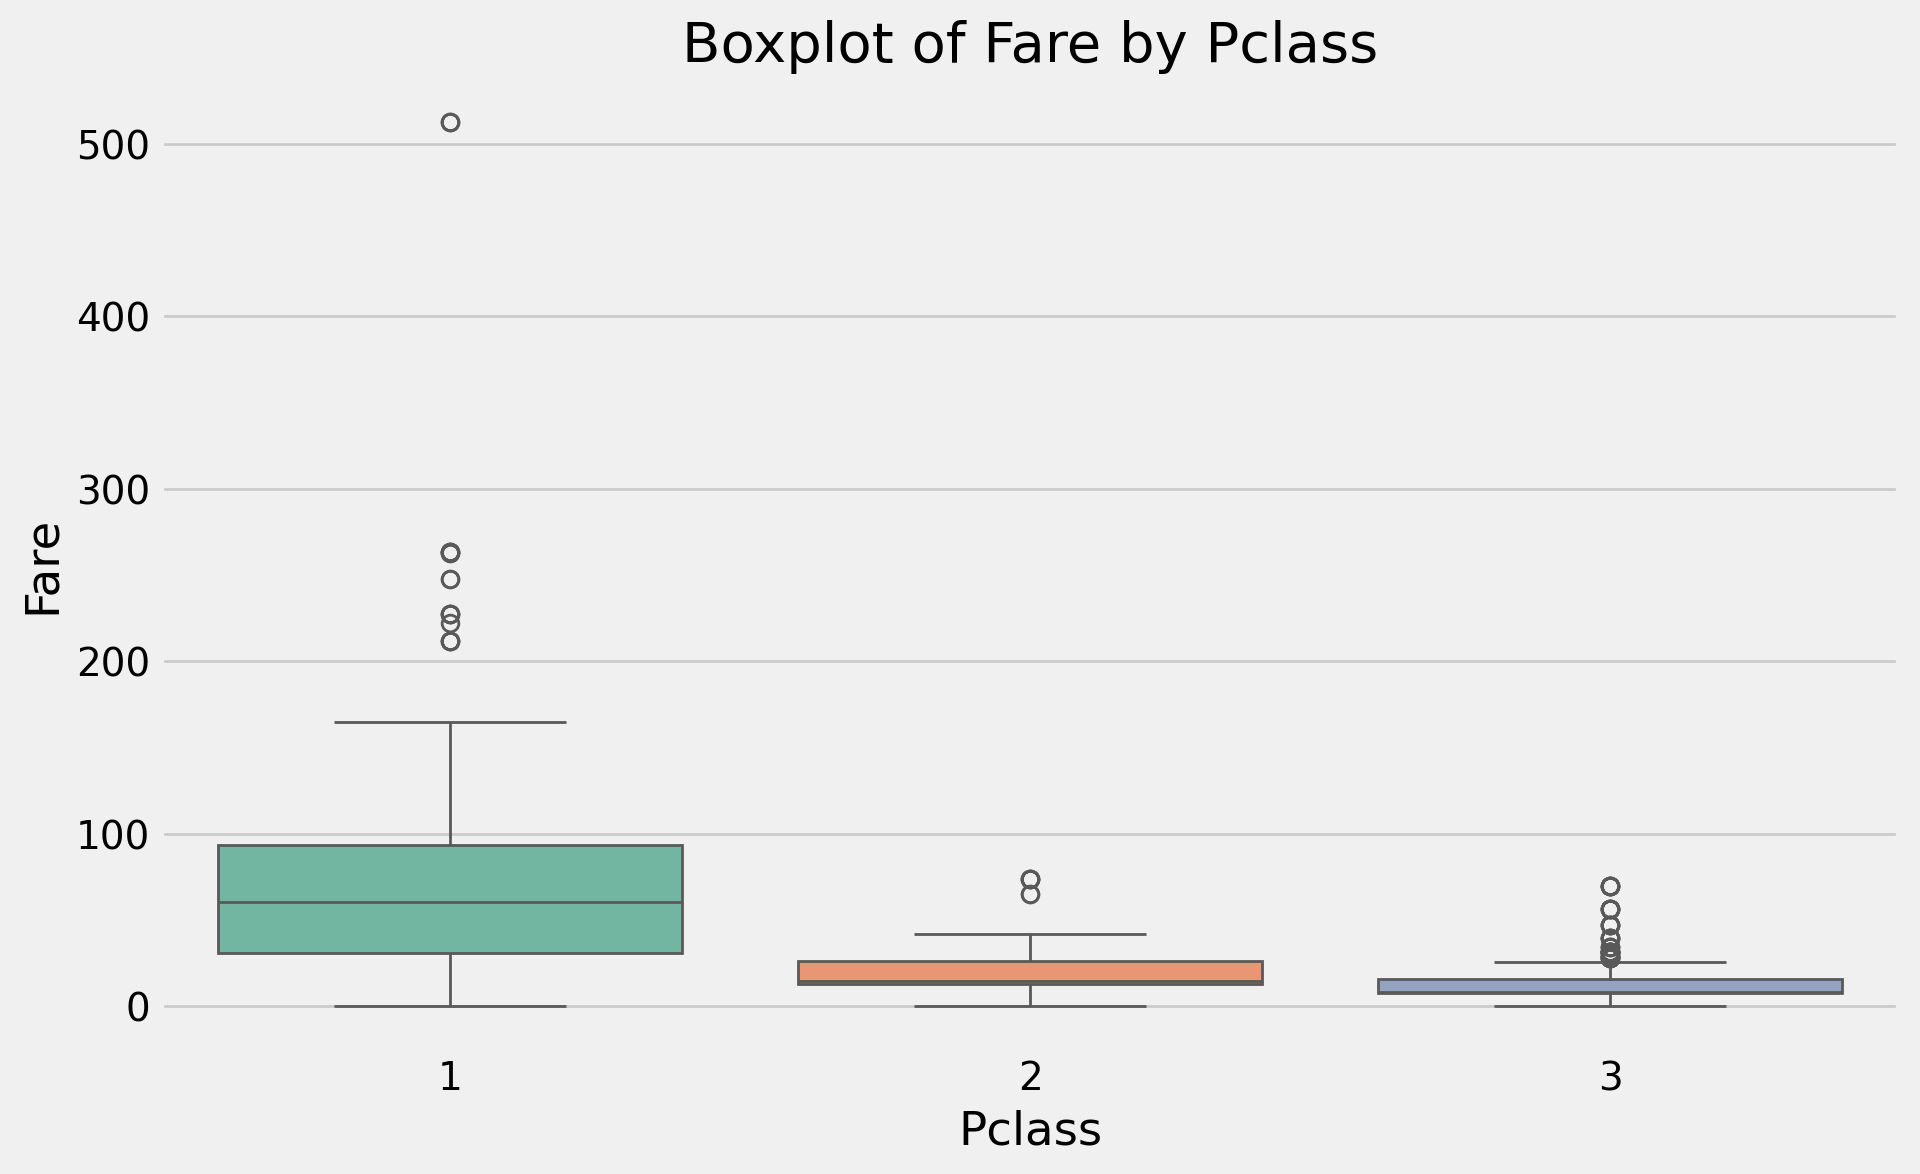

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. 'Pclass'와 'Fare' 간의 관계를 시각화합니다.
#    - 박스플롯(Boxplot)을 사용하여 Pclass별 운임 분포를 비교하세요.
# 2. x축에는 'Pclass'(좌석 등급), y축에는 'Fare'(운임)를 설정합니다.
# 3. Pclass에 따라 Fare가 어떻게 분포 차이를 보이는지 관찰하세요.
#    (예: Pclass가 높을수록 평균 운임이 낮아지는 경향 확인 가능)
# 4. 그래프의 제목, 축 라벨을 추가해 가독성을 높이세요.



1이 분산성이 크고, 2/3에서 차이가 나지 않습니다.

### VIF(Variance Inflation Factor)를 이용한 다중 공선성 확인하기

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 범주형 변수와 수치형 변수를 선택
categorical_vars = ['Pclass', 'Embarked', 'Sex']  # 예시
numeric_vars = ['Survived', 'Age', 'Fare' ]

# 범주형 변수를 더미 변수로 변환
X_categorical = pd.get_dummies(vif_test[categorical_vars], drop_first=True)

In [ ]:
# 수치형 변수와 더미 변수 결합
X_numeric = vif_test[numeric_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. 다중공선성(Multicollinearity)을 확인하기 위해 VIF(Variance Inflation Factor)를 계산합니다.
#    - statsmodels의 add_constant()를 사용해 상수항을 추가해야 합니다.
#    - 더미(dummy) 변수로 변환된 컬럼이 boolean인 경우 float으로 변환해야 합니다.
#
# 2. 각 변수별 VIF 값을 계산하고 DataFrame 형태로 정리합니다.
#    - VIF 값이 5 이상일 경우 다중공선성 문제를 의심할 수 있습니다.
#    - 일반적으로 VIF < 5 이면 다중공선성이 크지 않다고 판단합니다.
#
# 3. Titanic 데이터의 경우, 계산된 VIF 값들이 5 미만으로 다중공선성을 띠지 않는 것으로 확인되었습니다.



     Variable        VIF
0       const  45.637493
1    Survived   1.633894
2         Age   1.197552
3        Fare   1.510501
4      Pclass   1.886545
5  Embarked_Q   1.487443
6  Embarked_S   1.452153
7    Sex_male   1.448357


### 이진 변수 생성

In [ ]:
#Pclass를 1과 2/3으로 분리해보겠습니다.
vif_test['Pclass_1'] = (vif_test['Pclass'] == 1).astype(int)

categorical_vars = ['Embarked', 'Sex']  # Pclass는 이진 변수로 변환했으므로 제외
numeric_vars = ['Survived', 'Age', 'Fare', 'Pclass_1']

X_categorical = pd.get_dummies(vif_test[categorical_vars], drop_first=True)

X_numeric = vif_test[numeric_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = X.astype(float)  # 모든 데이터를 float 타입으로 변환

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  17.670159
1    Survived   1.571972
2         Age   1.168898
3        Fare   1.616279
4    Pclass_1   1.902379
5  Embarked_Q   1.463880
6  Embarked_S   1.479890
7    Sex_male   1.454234


1로 분리하고 보아도 다중 공선성을 판단하지는 않습니다.

### 그 외 다중 공선성을 처치하는 방법?

변수의 통합이나 제거, 차원의 축소, 정규화 또는 표준화를 통해 다중 공선성의 영향을 줄일 수 있습니다.
또한, 걱정된다면 릿지 회귀처럼 정규화가 포함된 모델을 사용해 모델링 단계에서 다중 공선성을 줄일 수도 있습니다.

# 이상치 판단

이상치 처리는 결측치 처리 이후 수행하는 것이 일반적이에요. 결측치가 이상치로 오인될 가능성을 줄이고 이상치의 처리가 더 명확해지기 때문입니다.

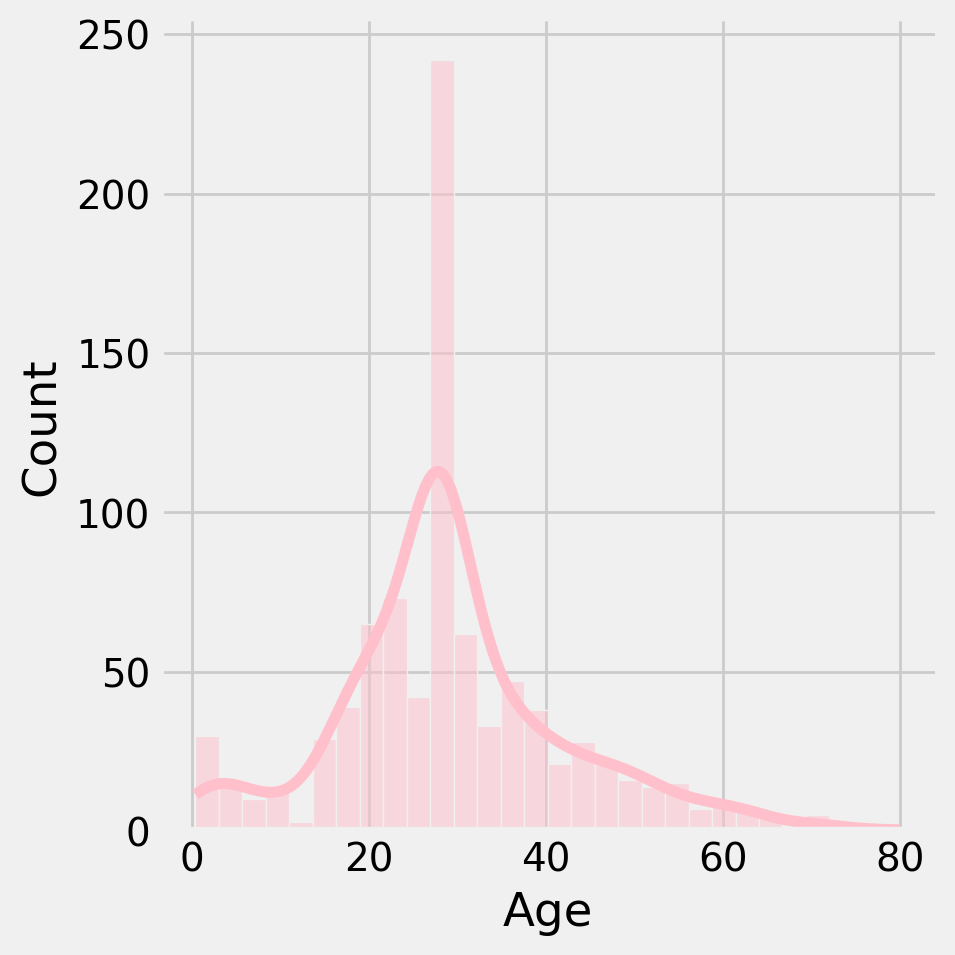

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. Age(나이) 변수의 분포를 시각화합니다.
#    - 히스토그램(histogram)과 커널 밀도(kde) 곡선을 함께 그려
#      나이 값이 어떤 분포를 가지는지 파악할 수 있습니다.
#    - color 매개변수로 색상을 변경할 수 있으며, 예시에서는 'pink'를 사용했습니다.
#
# 2. Titanic 데이터에서는 나이가 특정 구간에 몰려 있거나 결측치가 있어
#    추가적인 처리(결측치 대체, 나이대 그룹화)가 필요할 수 있습니다.


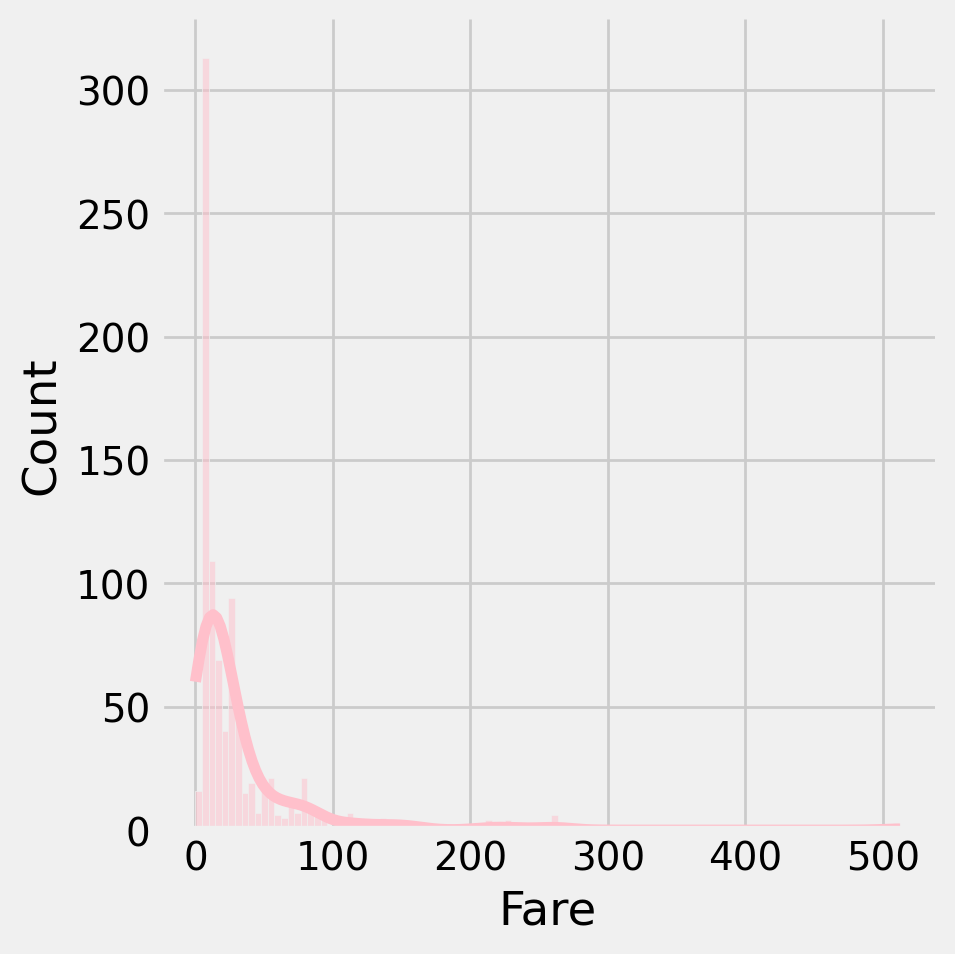

In [ ]:
# 👇 여기에 코드를 작성하세요.
# 1. Fare(요금) 변수의 분포를 시각화합니다.
#    - 히스토그램(histogram)과 커널 밀도(kde) 곡선을 함께 그려
#      승객 요금 분포가 어떻게 퍼져 있는지 확인할 수 있습니다.
#    - color 매개변수로 색상을 바꾸어 그래프의 가독성을 높일 수 있습니다.
#
# 2. Titanic 데이터에서 요금은 한쪽으로 치우친(skewed) 분포를 보이는 경우가 많습니다.
#    - 로그 변환(log transform) 등의 전처리를 고려할 수 있습니다.


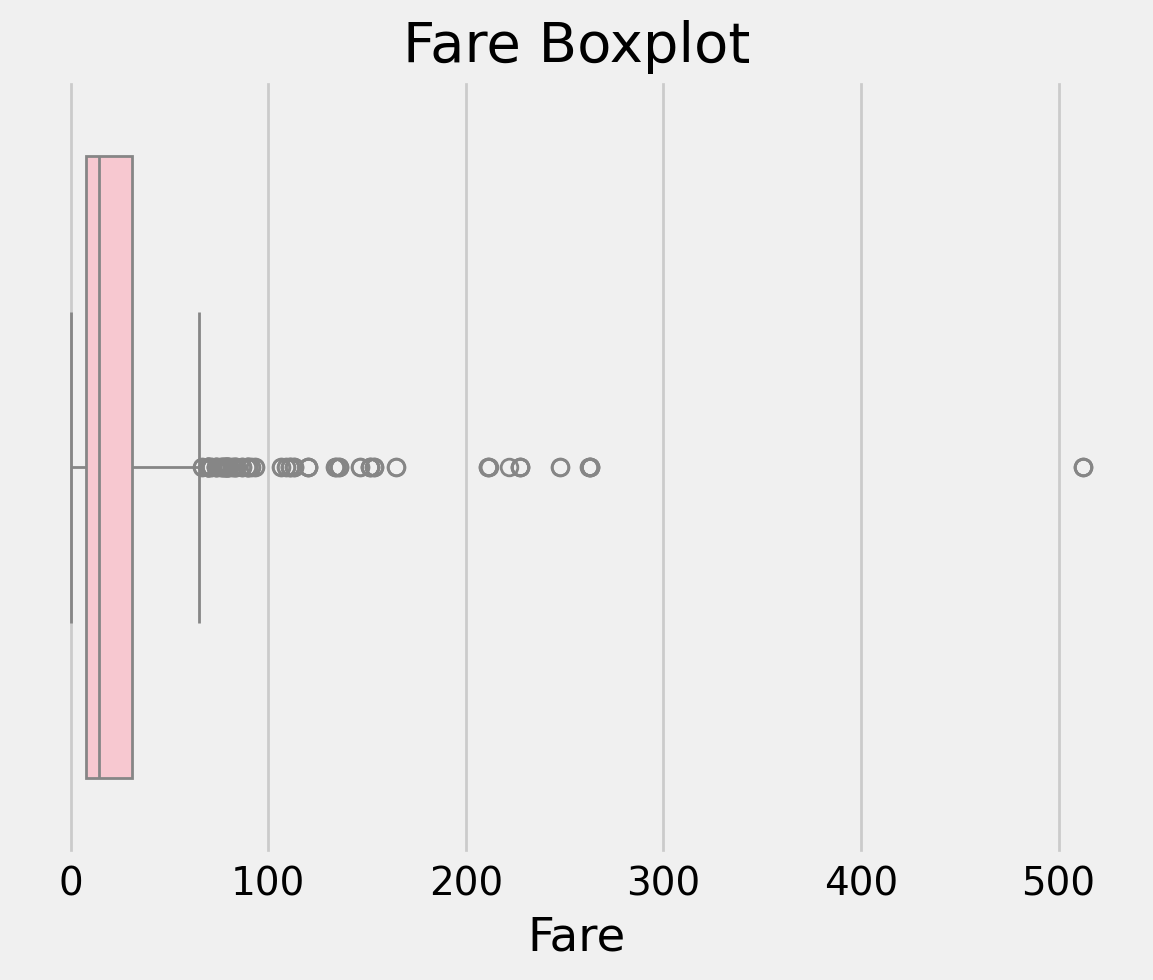

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    # 👇 여기에 코드를 작성하세요.
    # 1. 입력된 데이터프레임(df)의 특정 열(column)에 대해
    #    1사분위수(Q1), 3사분위수(Q3)를 계산합니다.
    # 2. IQR(Interquartile Range, 사분위 범위) = Q3 - Q1 을 구합니다.
    # 3. 일반적으로 이상치는 [Q1 - 1.5*IQR, Q3 + 1.5*IQR] 범위를 벗어난 값으로 정의합니다.
    # 4. 이 범위를 벗어나는 행(row)들을 반환하여 이상치를 탐지합니다.

outliers_fare = detect_outliers_iqr(input_train, 'Fare')

sns.boxplot(x=input_train['Fare'], color='pink')
plt.title('Fare Boxplot')
plt.show()

## Z-Score

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

정규분포에 가까운 Age는 Z-Score을 이용하여 이상치를 탐지하겠습니다.

In [ ]:
from scipy import stats

z_scores = stats.zscore(input_train['Age'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = input_train[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     Survived  Pclass   Sex   Age     Fare Embarked
96          0       1  male  71.0  34.6542        C
116         0       3  male  70.5   7.7500        Q
493         0       1  male  71.0  49.5042        C
630         1       1  male  80.0  30.0000        S
672         0       2  male  70.0  10.5000        S
745         0       1  male  70.0  71.0000        S
851         0       3  male  74.0   7.7750        S


In [ ]:
input_train = input_train[abs_z_scores <= age_threshold]

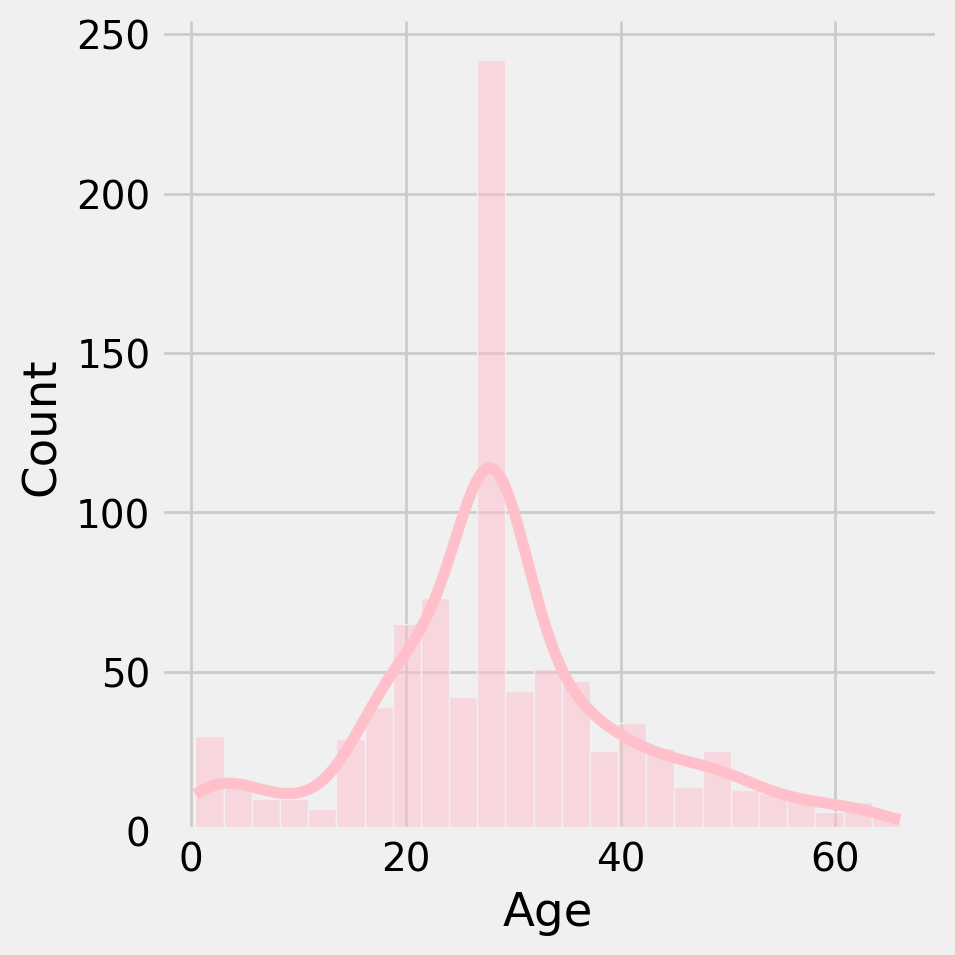

In [ ]:
#이상치 처리 후 모습
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

## IQR

비정규분포를 가지고 극단적 이상치가 많은 Fare 칼럼에서는 IQR으로 이상치를 판별하고 처리하겠습니다.

In [ ]:
# 3.2 Fare: IQR을 사용한 이상치 탐지 및 처리

    # 👇 여기에 코드를 작성하세요.
# 1. Fare 컬럼의 1사분위수(Q1), 3사분위수(Q3)를 구합니다.
# 2. IQR = Q3 - Q1 을 계산합니다.
# 3. IQR 기준으로 이상치를 정의합니다:
#    - 하한(fare_lower_bound) = Q1 - 1.5 * IQR
#    - 상한(fare_upper_bound) = Q3 + 1.5 * IQR
# 4. Fare 값이 이 범위를 벗어나면 이상치로 판단합니다.
#    → 해당 행들을 확인하거나(fare_outliers), 제거/대체할 수 있습니다.
# 5. 여기서는 이상치를 제거하는 방식으로 처리합니다.




Fare 이상치 (IQR 기준):
     Survived  Pclass     Sex   Age      Fare Embarked
1           1       1  female  38.0   71.2833        C
27          0       1    male  19.0  263.0000        S
31          1       1  female  28.0  146.5208        C
34          0       1    male  28.0   82.1708        C
52          1       1  female  49.0   76.7292        C
..        ...     ...     ...   ...       ...      ...
846         0       3    male  28.0   69.5500        S
849         1       1  female  28.0   89.1042        C
856         1       1  female  45.0  164.8667        S
863         0       3  female  28.0   69.5500        S
879         1       1  female  56.0   83.1583        C

[115 rows x 6 columns]


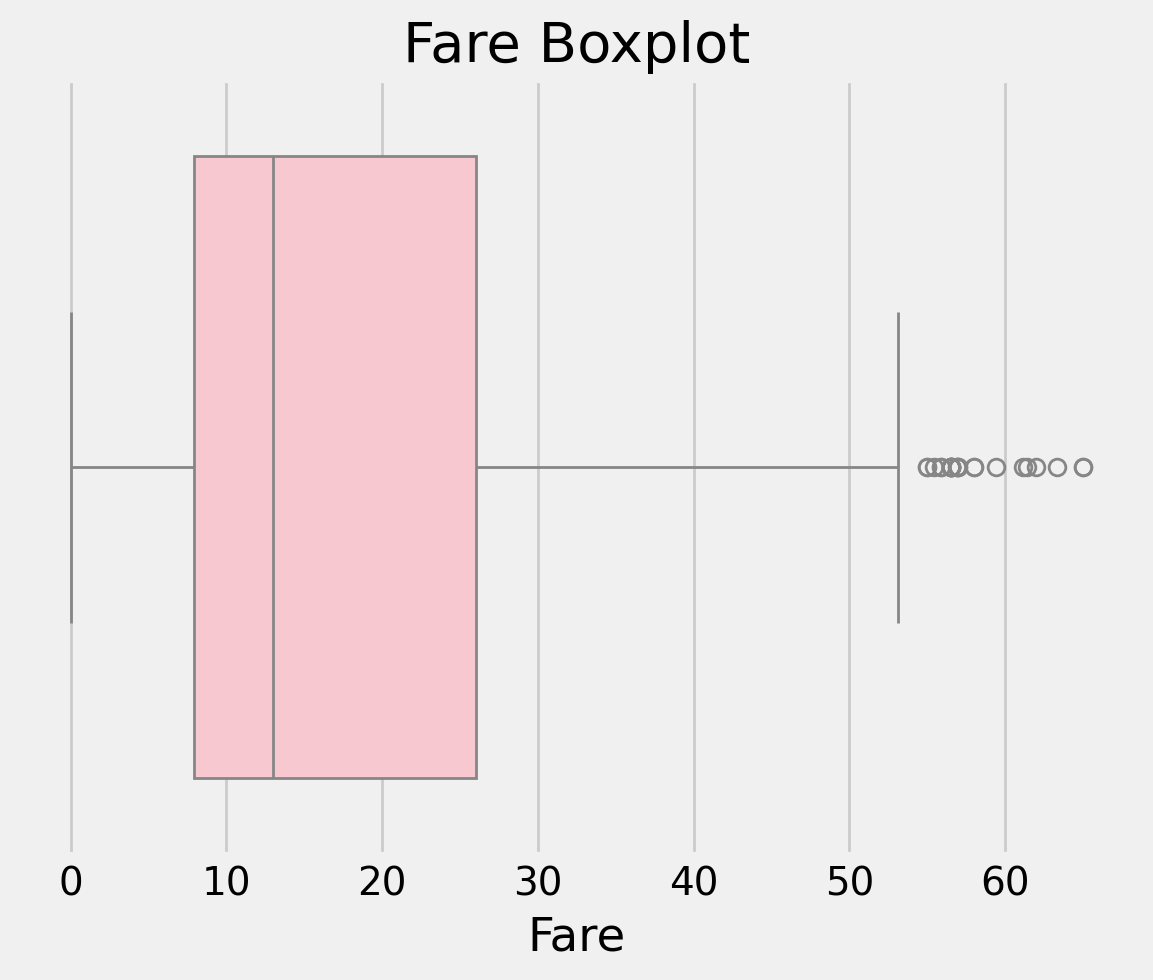

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(input_train, 'Fare')

sns.boxplot(x=input_train['Fare'], color='pink')
plt.title('Fare Boxplot')

#정제 완료된 모습
plt.show()

# 스케일

In [ ]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  769 non-null    int64  
 1   Pclass    769 non-null    int64  
 2   Sex       769 non-null    object 
 3   Age       769 non-null    float64
 4   Fare      769 non-null    float64
 5   Embarked  769 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 42.1+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 단계 (연속형 변수: Age, Fare)
    # 👇 여기에 코드를 작성하세요.

# 1. MinMaxScaler 객체를 초기화합니다.
#    → 모든 값을 0과 1 사이로 변환해주는 스케일러입니다.

# 2. 훈련 데이터 복사본(input_scaled)을 생성합니다.

# 3. 연속형 변수(Age, Fare)에 대해서만 스케일링을 적용합니다.
#    - scaler.fit_transform()을 사용하여 [Age, Fare] 범위를 [0, 1]로 변환합니다.

# 인코딩

In [ ]:
# 범주형 변수에 대한 원-핫 인코딩 단계
    # 👇 여기에 코드를 작성하세요.

# 1. 범주형 변수(Pclass, Embarked, Sex)를 원-핫 인코딩합니다.
#    → 각 범주의 고유 값을 새로운 컬럼으로 변환 (0/1 표시).
#    → drop_first=True 옵션으로 첫 번째 범주를 제거하여 다중공선성 문제 방지.

# 2. 인코딩된 결과를 input_processed에 저장합니다.
#    (input_scaled → input_processed 로 확장된 데이터셋 생성)

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,0.329064,0.111538,False,True,False,True,True
2,1,0.390058,0.121923,False,True,False,True,False
3,1,0.527295,0.816923,False,False,False,True,False
4,0,0.527295,0.123846,False,True,False,True,True
5,0,0.420555,0.130128,False,True,True,False,True
...,...,...,...,...,...,...,...,...
886,0,0.405306,0.200000,True,False,False,True,True
887,1,0.283318,0.461538,False,False,False,True,False
888,0,0.420555,0.360769,False,True,False,True,False
889,1,0.390058,0.461538,False,False,False,False,True


In [ ]:
input_processed

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,0.329064,0.111538,False,True,False,True,True
2,1,0.390058,0.121923,False,True,False,True,False
3,1,0.527295,0.816923,False,False,False,True,False
4,0,0.527295,0.123846,False,True,False,True,True
5,0,0.420555,0.130128,False,True,True,False,True
...,...,...,...,...,...,...,...,...
886,0,0.405306,0.200000,True,False,False,True,True
887,1,0.283318,0.461538,False,False,False,True,False
888,0,0.420555,0.360769,False,True,False,True,False
889,1,0.390058,0.461538,False,False,False,False,True


# 데이터 분할

훈련 데이터와 테스트 데이터로 나누어 모델을 평가할 수 있도록 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X = input_processed.drop('Survived', axis=1)  # 'Survived'를 제외한 모든 feature
y = input_processed['Survived']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 모델 활용

랜덤포레스트의 장점:
앙상블 기법이므로 과적합이 잘 일어나지 않는다.
앙상블이므로 결측치나 이상치에 강하다.
회귀 알고리즘이 아닌 의사결정나무 알고리즘에 기반한 기법이기 때문에 scaling, 정규화 과정이 필요 없다.
비선형적 데이터에 강한데, 이 역시 회귀 알고리즘이 아니라 의사결정나무이기 때문이다.
새로운 데이터가 들어와도 크게 영향을 받지 않는다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7965

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.62      0.67      0.64        63

    accuracy                           0.80       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.80      0.80      0.80       231


Confusion Matrix:
[[142  26]
 [ 21  42]]


또 다른 정확도 확인 방법이 뭐가 있을까요?

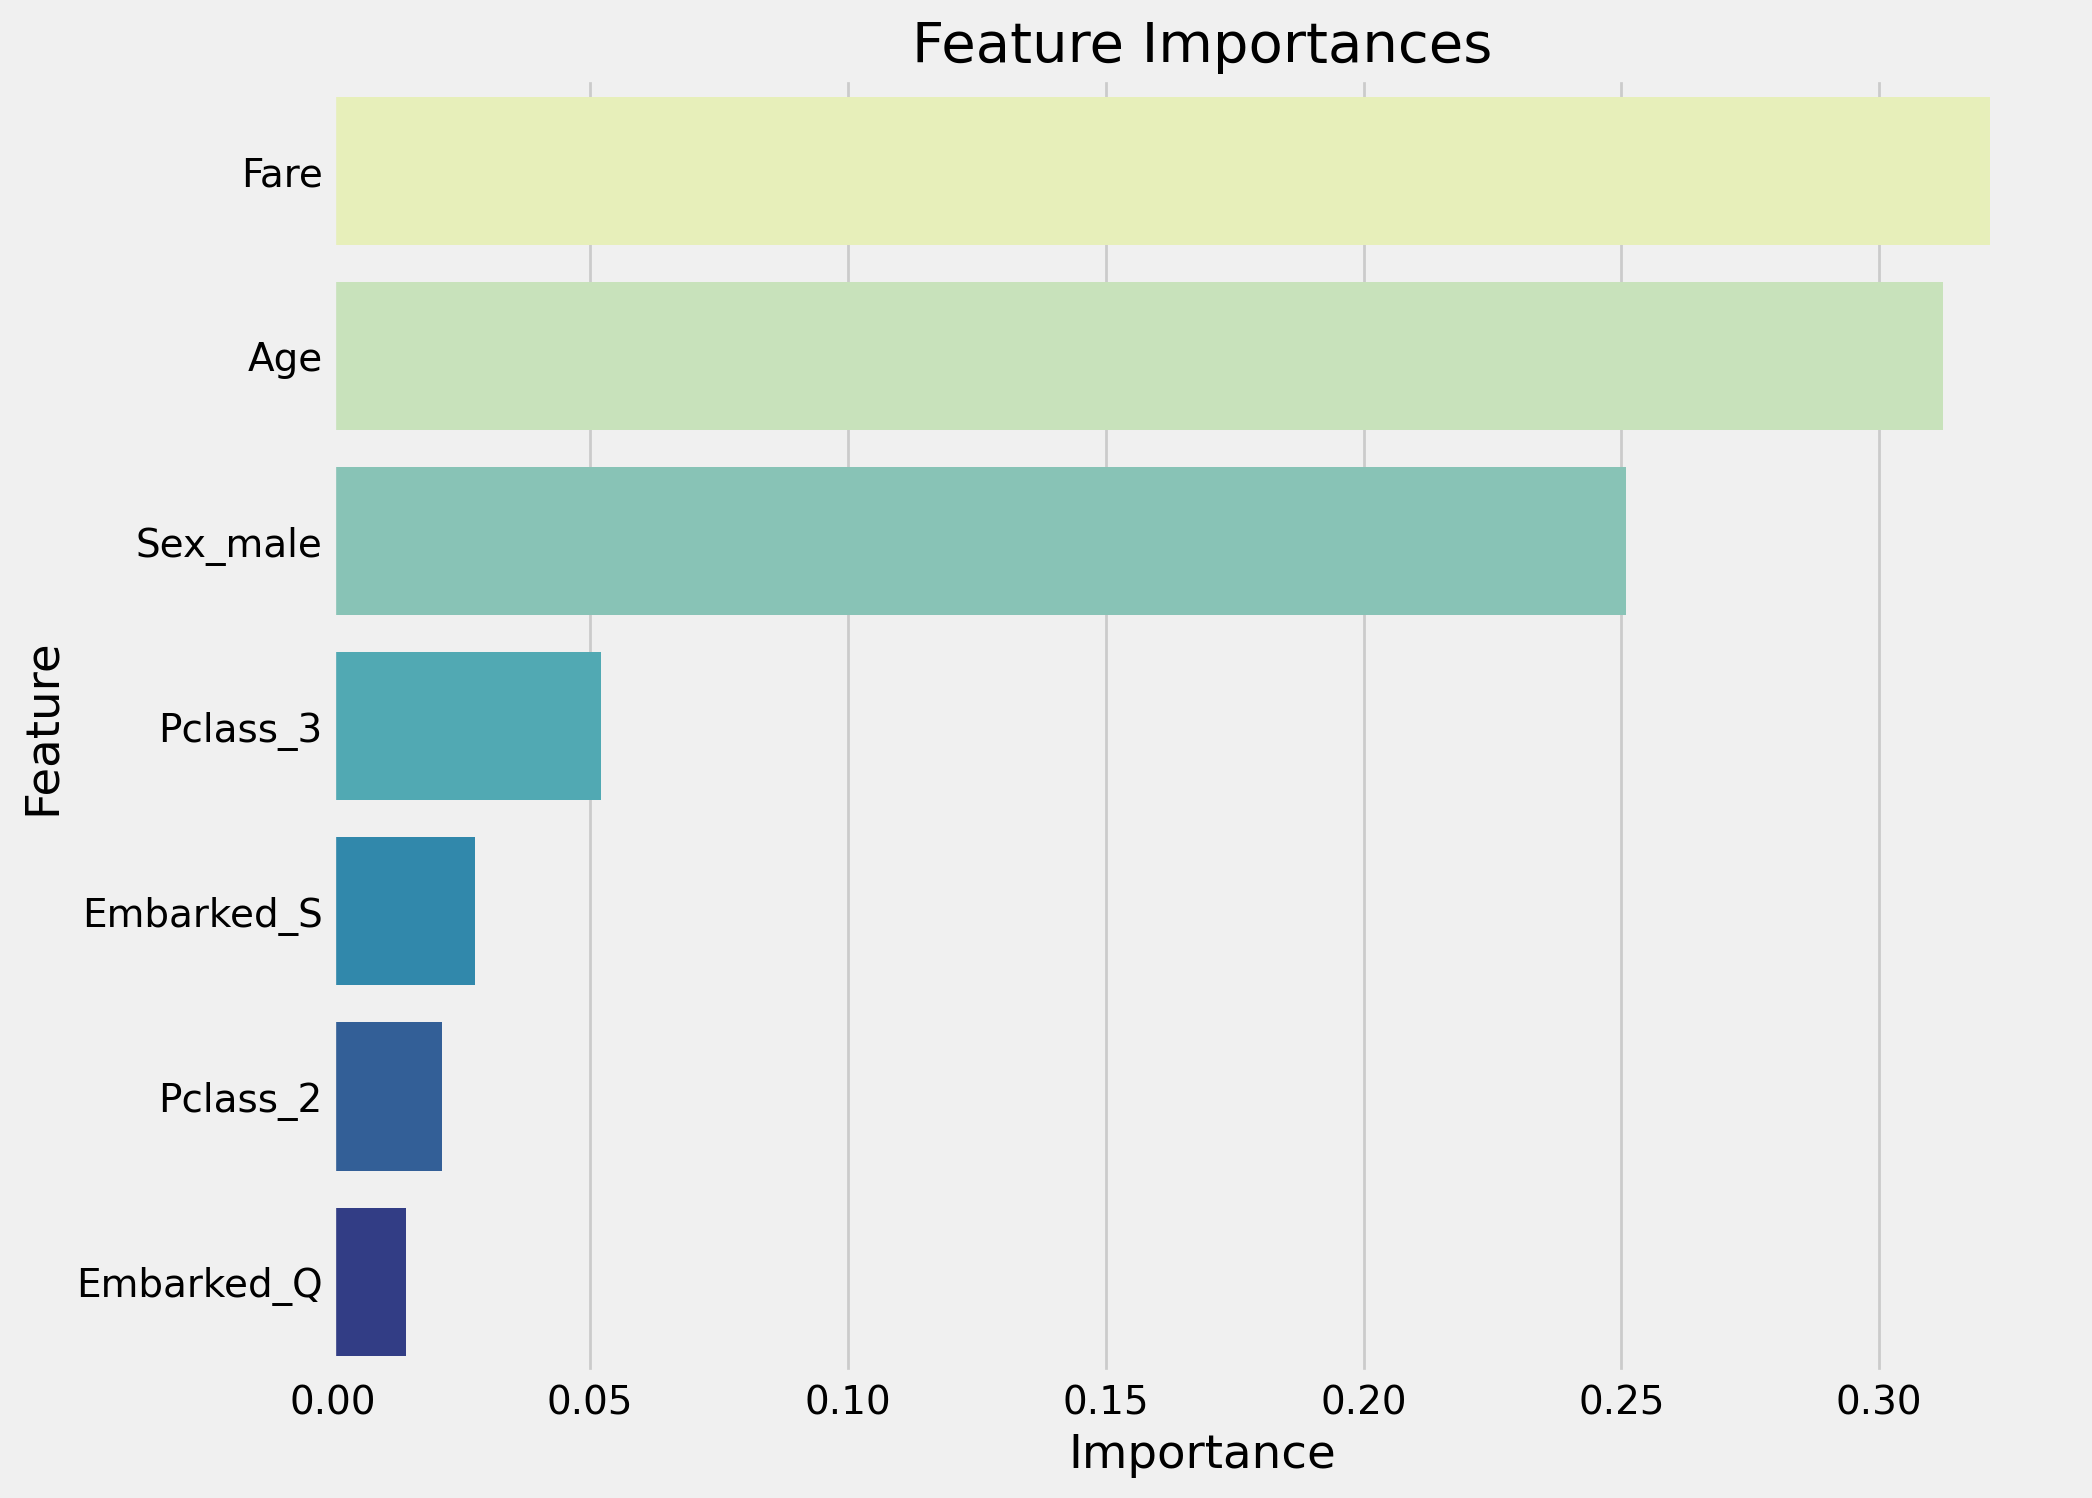

In [ ]:
# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X_train.columns

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순서로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importances')
plt.show()

Feature Importance를 확인하여 영향이 없는 칼럼을 삭제하거나 합치는 등 작업을 수행할 수 있습니다.

# 예측

### test 파일 전처리

훈련 데이터에 대해 수행한 스케일링, 인코딩, 컬럼 선택 등 전처리 과정은 테스트 데이터에도 동일하게 적용되어야 합니다.

In [ ]:
#피쳐 선택
test = ori_test[['Age', 'Fare', 'Embarked', 'Sex', 'Pclass']]

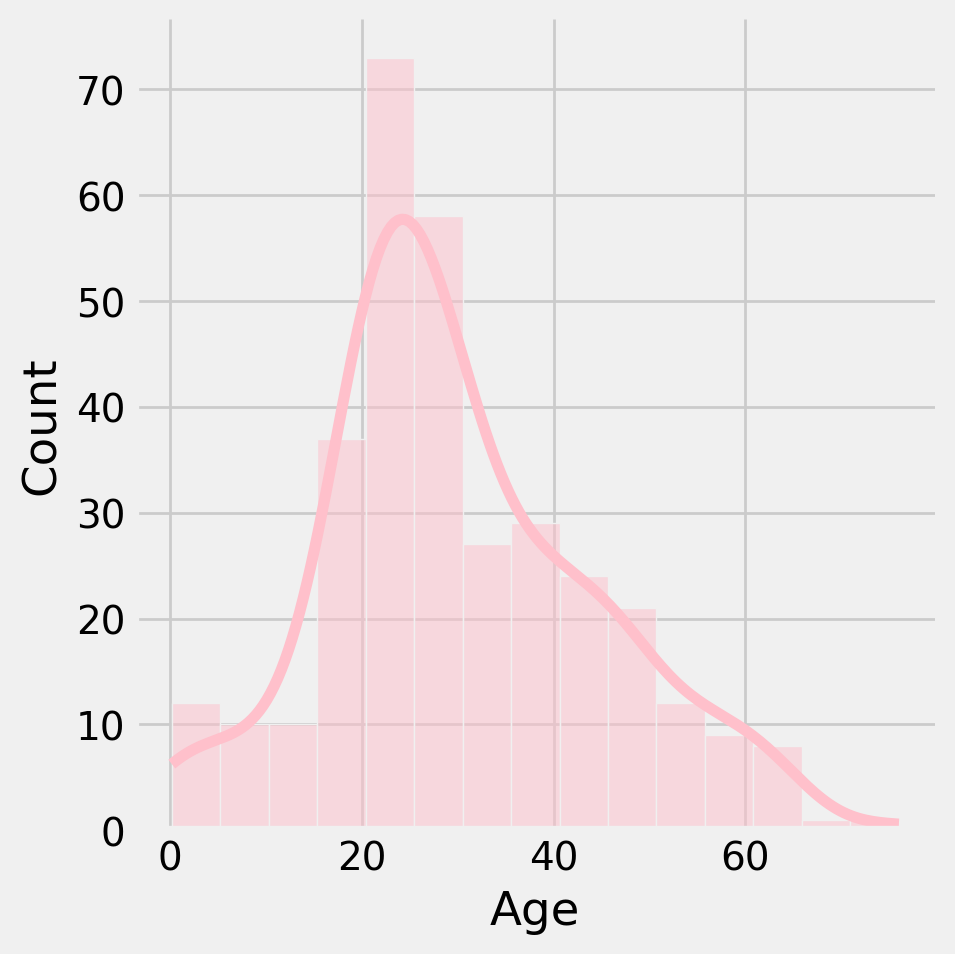

In [ ]:
#Mean or Median? 데이터 분포를 확인해 결정하기!
sns.displot(test['Age'], kde=True, color='pink')
plt.show()

In [ ]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

In [ ]:
#fare 결측치 처리
test['Fare'].fillna(test['Fare'].median(), inplace=True)

### 이상치 판단

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

In [ ]:
# 범주형 변수를 원-핫 인코딩
test = pd.get_dummies(test, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True) #첫번째 범주를 드롭하여 다중공선성 문제 최소화
test
#scaled, encoding 완료되었습니다.

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.452723,0.015282,False,True,True,False,True
1,0.617566,0.013663,False,True,False,True,False
2,0.815377,0.018909,True,False,True,False,True
3,0.353818,0.016908,False,True,False,True,True
4,0.287881,0.023984,False,True,False,True,False
...,...,...,...,...,...,...,...
413,0.353818,0.015713,False,True,False,True,True
414,0.512066,0.212559,False,False,False,False,False
415,0.505473,0.014151,False,True,False,True,True
416,0.353818,0.015713,False,True,False,True,True


In [ ]:
# 예측 단계

    # 👇 여기에 코드를 작성하세요.
# 1. 학습 때 사용한 컬럼 순서와 동일하게 맞추기
#    → test 데이터셋의 컬럼을 X_train과 동일하게 재정렬
#    → 없는 컬럼은 fill_value=0 으로 채워줍니다.

# 2. 학습된 모델(model)을 이용해 예측 수행
#    → y_pred_test에 예측 결과 저장

# 3. 예측 결과를 test 데이터프레임에 새로운 컬럼 'Survived'로 추가

# 4. 최종적으로 test[['Survived']] 형태로 예측 결과 확인

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [ ]:
test['Survived'].value_counts()

,count
Survived,
0,266
1,152


# 모델 저장

In [ ]:
from datetime import datetime

feature_importances = model.feature_importances_
features = test.columns

feature_importance_list = list(zip(features, feature_importances))

args.results.append(
    {
        'model': 'forest11',
        'score_tr': '',
        'score_te': '',
        'auc_te': accuracy,
        'len_features': test.shape[1],
        'feature_importances': feature_importance_list,  # 리스트 형태로 저장
        'create_dt': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
)

args.results

[{'model': 'forest11',
  'score_tr': '',
  'score_te': '',
  'auc_te': 0.7965367965367965,
  'len_features': 8,
  'feature_importances': [('Age', 0.3123964205354884),
   ('Fare', 0.3214425444483117),
   ('Pclass_2', 0.02121212251841271),
   ('Pclass_3', 0.052125803882712714),
   ('Embarked_Q', 0.014178579237442297),
   ('Embarked_S', 0.027730106595362014),
   ('Sex_male', 0.25091442278227016)],
  'create_dt': '2024-09-03 10:14:11'},
 {'model': 'forest11',
  'score_tr': '',
  'score_te': '',
  'auc_te': 0.7965367965367965,
  'len_features': 8,
  'feature_importances': [('Age', 0.3123964205354884),
   ('Fare', 0.3214425444483117),
   ('Pclass_2', 0.02121212251841271),
   ('Pclass_3', 0.052125803882712714),
   ('Embarked_Q', 0.014178579237442297),
   ('Embarked_S', 0.027730106595362014),
   ('Sex_male', 0.25091442278227016)],
  'create_dt': '2024-09-03 10:20:42'}]

In [ ]:
# 결과 출력 단계

    # 👇 여기에 코드를 작성하세요.
# 1. 모델별 결과 확인
#    → 반복문을 돌면서 각 결과(result)의 모델명, 테스트 AUC 점수, 생성 일자를 출력합니다.

# 2. 특정 모델 결과만 추출
#    → 예: 'forest11' 모델의 결과만 리스트로 필터링

Model: forest11, AUC: 0.7965367965367965, Date: 2024-09-03 10:14:11
Model: forest11, AUC: 0.7965367965367965, Date: 2024-09-03 10:20:42


In [ ]:
model_result_df = pd.DataFrame(model_results)

In [ ]:
# AUC 값을 기준으로 내림차순 정렬
sorted_results = model_result_df.sort_values(by='auc_te', ascending=False)

In [ ]:
# 가장 높은 AUC를 가진 모델의 예측값 선택
best_model = sorted_results.iloc[0]
best_model_predictions = best_model['feature_importances']

In [ ]:
# PassengerId와 Survived를 함께 결합합니다
submission = pd.concat([ori_test[['PassengerId']], test[['Survived']]], axis=1)

In [ ]:
submission.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
import os
#휘발성이므로 런타임 해제될 시 확인 불가. 따라서 json/csv로 저장하는 것이 권장

today_results = pd.DataFrame(args.results)

file_path = 'model_results.csv'

if os.path.exists(file_path):
    existing_results = pd.read_csv(file_path)
    combined_results = pd.concat([existing_results, today_results], ignore_index=True)
else:
    combined_results = today_results

combined_results.to_csv(file_path, index=False)

print(f"Results have been saved to {file_path}")

Results have been saved to model_results.csv


# Submission

In [ ]:
submission['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [ ]:
ori_train['Survived'].value_counts()

,count
Survived,
0,549
1,342
